In [1]:
# !pip install plotly

In [2]:
from tsdata.raw import available_data, load_data

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams["figure.figsize"] = (18, 8)

import scipy.stats as st
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.distributions.empirical_distribution import ECDF

from sklearn.metrics import mean_absolute_error #r2_score, median_absolute_error, 

import warnings
warnings.filterwarnings('ignore')

In [3]:
def plot_decomposition(decomposition):
    plt.subplots(3, 1, figsize=(20, 21))

    plt.subplot(3, 1, 1)
    plt.plot(decomposition.trend, color='navy', markersize=3, label='trend')
    plt.legend(loc='upper right')
    plt.grid(linestyle=':', color='k')
    plt.title("Trend")


    plt.subplot(3, 1, 2)
    plt.plot(decomposition.seasonal, 
             '-gd', markersize=3, label='seasonal')
    plt.plot([decomposition.seasonal.index[0], decomposition.seasonal.index[-1]], 
             decomposition.seasonal.mean()*np.array([1, 1]), '--k', 
             label=f"mean = {decomposition.seasonal.mean():.3g}")
    plt.legend(loc='upper right')
    plt.grid(linestyle=':', color='k')
    plt.title(f"Seasonal : range={(decomposition.seasonal.max() - decomposition.seasonal.min()):.3g}")


    plt.subplot(3, 1, 3)
    plt.plot(decomposition.resid, '-o', color='maroon', markersize=3,  label='residuals')
    plt.plot([decomposition.resid.index[0], decomposition.resid.index[-1]], 
             decomposition.resid.mean()*np.array([1, 1]), '--k', 
             label=f"mean = {decomposition.resid.mean():.3g}")
    plt.legend(loc='upper right')
    plt.grid(linestyle=':', color='k')
    plt.title("Residuals")

    plt.show()
    

def correlation_analysis(data, decomposition):
    N = len(data)
    plot_acf(data, 
             lags=N-1, 
             vlines_kwargs={'color' : 'b'},
             markerfacecolor='b', markeredgecolor='b', 
             title='Autocorrelation of target');

    trend = decomposition.trend
    N = len(trend.dropna())
    k = np.arange(0, N)
    plot_acf(trend.dropna(), 
             lags=N-1, 
             vlines_kwargs={'color' : 'navy'}, 
             markerfacecolor='navy', markeredgecolor='navy', 
             title='Autocorrelation of trend');

    seasonal = decomposition.seasonal
    N = len(seasonal)
    plot_acf(seasonal, 
             lags=N-1, 
             vlines_kwargs={'color' : 'g'}, 
             markerfacecolor='g', markeredgecolor='g', 
             title='Autocorrelation of seasonal');

    resid = decomposition.resid
    N = len(resid.dropna())
    plot_acf(resid.dropna(), 
             lags=N-1,   
             vlines_kwargs={'color' : 'maroon'}, 
             markerfacecolor='maroon', markeredgecolor='maroon', 
             title='Autocorrelation of residuals');


    plt.show()
    
    
def partial_autocorrelation(data, decomposition, lags=36):
    plot_pacf(data, 
             lags=lags, 
             vlines_kwargs={'color' : 'b'},
             markerfacecolor='b', markeredgecolor='b', 
             title='Partial autocorrelation of target');

    trend = decomposition.trend
    plot_pacf(trend.dropna(), 
             lags=lags, 
             vlines_kwargs={'color' : 'navy'}, 
             markerfacecolor='navy', markeredgecolor='navy', 
             title='Partial autocorrelation of trend');

    seasonal = decomposition.seasonal
    plot_pacf(seasonal, 
             lags=lags, 
             vlines_kwargs={'color' : 'g'}, 
             markerfacecolor='g', markeredgecolor='g', 
             title='Partial autocorrelation of seasonal');

    resid = decomposition.resid
    plot_pacf(resid.dropna(), 
             lags=lags,   
             vlines_kwargs={'color' : 'maroon'}, 
             markerfacecolor='maroon', markeredgecolor='maroon', 
             title='Partial autocorrelation of residuals');

    plt.show()
    

In [4]:
print(available_data())

['LakeHuron', 'PBS', 'ansett', 'aus_accommodation', 'aus_airpassengers', 'aus_arrivals', 'aus_livestock', 'aus_production', 'aus_retail', 'bank_calls', 'boston_marathon', 'canadian_gas', 'gafa_stock', 'global_economy', 'guinea_rice', 'hh_budget', 'insurance', 'nyc_bikes', 'olympic_running', 'pedestrian', 'pelt', 'prices', 'prison', 'souvenirs', 'tourism', 'tute1', 'us_change', 'us_employment', 'us_gas_total', 'us_gasoline', 'vic_elec']


# Tasks: 1, 2

Use the help function to explore what the series gafa_stock, PBS, vic_elec and pelt represent.

1. Use autoplot() to plot some of the series in these data sets.
2. What is the time interval of each series?

In [5]:
gafa_stock = load_data('gafa_stock')
PBS = load_data('PBS')
vic_elec = load_data('vic_elec')
pelt = load_data('pelt')

In [6]:
gafa_stock.head()

Symbol        Date       Open       High        Low      Close  Adj_Close  \
0   AAPL  2014-01-02  79.382858  79.575714  78.860001  79.018570  66.964325   
1   AAPL  2014-01-03  78.980003  79.099998  77.204285  77.282860  65.493416   
2   AAPL  2014-01-06  76.778572  78.114288  76.228569  77.704285  65.850533   
3   AAPL  2014-01-07  77.760002  77.994286  76.845711  77.148575  65.379593   
4   AAPL  2014-01-08  76.972855  77.937141  76.955711  77.637146  65.793633   

      Volume  
0   58671200  
1   98116900  
2  103152700  
3   79302300  
4   64632400

In [7]:
gafa_stock.Symbol.unique()
gafa_stock['Symbol'].unique()

array(['AAPL', 'AMZN', 'FB', 'GOOG'], dtype=object)

<div style="background-color: rgb(175, 219, 245);">
<span style="color:blue">

**NOTE:** 

It is better use `['column_name_string']` to call the column by name 
    
instead of `df.column_name_string` since just imagine, e.g., what if the `column_name = mean`

</span>
</div>

In [8]:
gafa_stock.Date = pd.to_datetime(gafa_stock.Date)

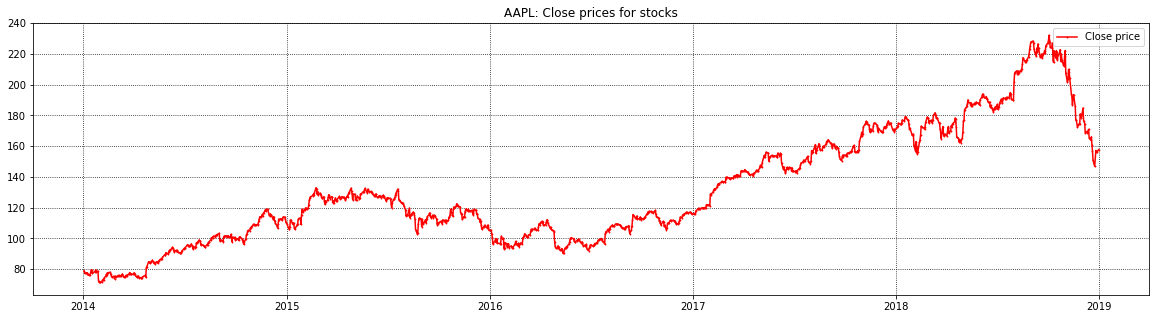

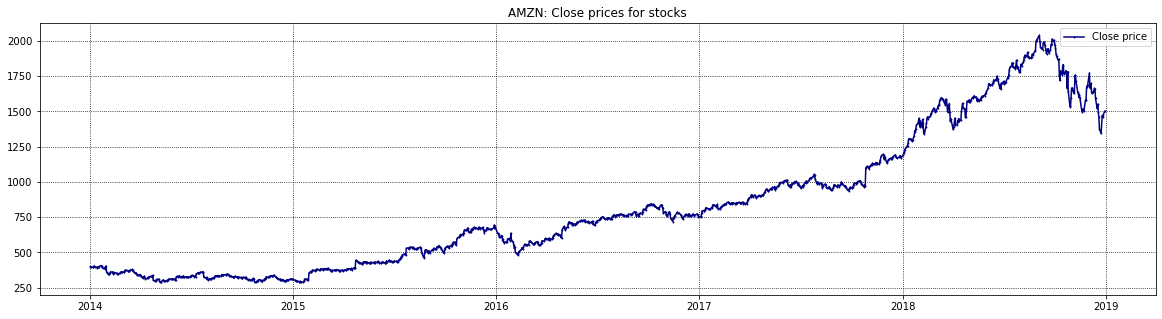

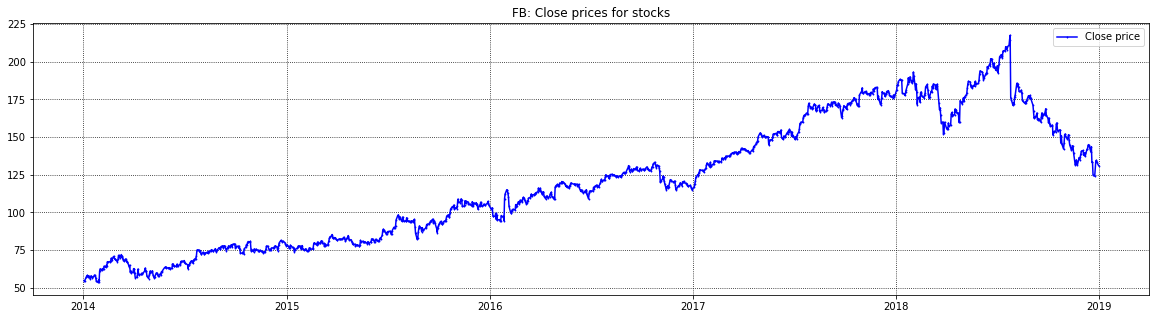

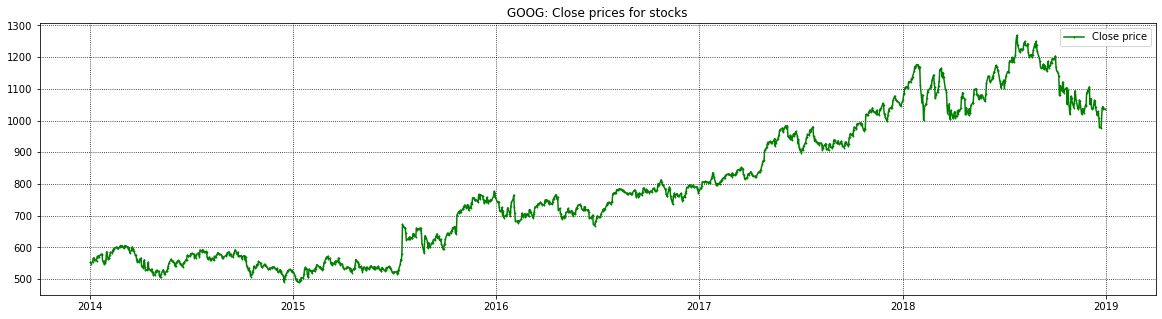

In [9]:
# g = sns.lineplot(data=gafa_stock, x='Date', y='Close', hue='Symbol')

company_names = gafa_stock.Symbol.unique()
n_companies = len(company_names) 
colors = ['red', 'navy', 'blue', 'green']

for color, company_name in zip(colors, company_names):
    plt.figure(figsize=(20, 5))
    x = gafa_stock[gafa_stock.Symbol == company_name]['Date']
    y = gafa_stock[gafa_stock.Symbol == company_name]['Close']
    plt.plot(x, y, '-d', color=color, markersize=1)
    plt.legend(['Close price',], loc='upper right')
    plt.grid(linestyle=':', color='k')
    plt.title(f'{company_name}: Close prices for stocks')

# What is the time interval of each series?
# day interval without weekends

<div style="background-color: rgb(255, 255, 224);">
<span style="color: rgb(186, 22, 12)">

**ALERT:** 

And what information can we extract from these plots?
    
General remark - there is a lack of conclusions, ideas, hypotheses...
    
**I suspect** these data for non-equidistance

</span>
</div>


<div style="background-color: rgb(255, 255, 224);">
<span style="color: rgb(186, 22, 12)">

**ALERT:** 

Are you sure that your data are equidistant, i.e., you have not missing months?

</span>
</div>

In [10]:
PBS.head()

Month    Concession         Type ATC1                        ATC1_desc  \
0  1991 Jul  Concessional  Co-payments    A  Alimentary tract and metabolism   
1  1991 Aug  Concessional  Co-payments    A  Alimentary tract and metabolism   
2  1991 Sep  Concessional  Co-payments    A  Alimentary tract and metabolism   
3  1991 Oct  Concessional  Co-payments    A  Alimentary tract and metabolism   
4  1991 Nov  Concessional  Co-payments    A  Alimentary tract and metabolism   

  ATC2                    ATC2_desc  Scripts     Cost  
0  A01  STOMATOLOGICAL PREPARATIONS    18228  67877.0  
1  A01  STOMATOLOGICAL PREPARATIONS    15327  57011.0  
2  A01  STOMATOLOGICAL PREPARATIONS    14775  55020.0  
3  A01  STOMATOLOGICAL PREPARATIONS    15380  57222.0  
4  A01  STOMATOLOGICAL PREPARATIONS    14371  52120.0

In [11]:
PBS[(PBS.Concession == 'Concessional') & (PBS.Type == 'Co-payments') & (PBS.ATC1 == 'A') & (PBS.ATC2_desc == 'STOMATOLOGICAL PREPARATIONS')]

Month    Concession         Type ATC1  \
0    1991 Jul  Concessional  Co-payments    A   
1    1991 Aug  Concessional  Co-payments    A   
2    1991 Sep  Concessional  Co-payments    A   
3    1991 Oct  Concessional  Co-payments    A   
4    1991 Nov  Concessional  Co-payments    A   
..        ...           ...          ...  ...   
199  2008 Feb  Concessional  Co-payments    A   
200  2008 Mar  Concessional  Co-payments    A   
201  2008 Apr  Concessional  Co-payments    A   
202  2008 May  Concessional  Co-payments    A   
203  2008 Jun  Concessional  Co-payments    A   

                           ATC1_desc ATC2                    ATC2_desc  \
0    Alimentary tract and metabolism  A01  STOMATOLOGICAL PREPARATIONS   
1    Alimentary tract and metabolism  A01  STOMATOLOGICAL PREPARATIONS   
2    Alimentary tract and metabolism  A01  STOMATOLOGICAL PREPARATIONS   
3    Alimentary tract and metabolism  A01  STOMATOLOGICAL PREPARATIONS   
4    Alimentary tract and metabolism  A01  STOMATOLOGICAL PREPARATIONS   
..                               ...  ...                          ...   
199  Alimentary tract and metabolism  A01  STOMATOLOGICAL PREPARATIONS   
200  Alimentary tract and metabolism  A01  STOMATOLOGICAL PREPARATIONS   
201  Alimentary tract and metabolism  A01  STOMATOLOGICAL PREPARATIONS   
202  Alimentary tract and metabolism  A01  STOMATOLOGICAL PREPARATIONS   
203  Alimentary tract and metabolism  A01  STOMATOLOGICAL PREPARATIONS   

     Scripts     Cost  
0      18228  67877.0  
1      15327  57011.0  
2      14775  55020.0  
3      15380  57222.0  
4      14371  52120.0  
..       ...      ...  
199    14818  72128.0  
200    13829  67879.0  
201    16383  81543.0  
202    13886  70370.0  
203    11221  56788.0  

[204 rows x 9 columns]

<div style="background-color: rgb(175, 219, 245);">
<span style="color:blue">

**NOTE:** 

It will be better to create new table dropping all columns that now have a single value.

</span>.
</div>

In [12]:
fig = px.line(PBS[(PBS.Concession == 'Concessional') & (PBS.Type == 'Co-payments') & 
                  (PBS.ATC1 == 'A') & (PBS.ATC2_desc == 'STOMATOLOGICAL PREPARATIONS')], 
              x='Month', y='Cost', title='Cost of STOMATOLOGICAL PREPARATIONS', markers=True)
fig.show()

# monthly interval

## `vic_elec`

In [13]:
vic_elec

Time       Demand  Temperature        Date  Holiday
0      2011-12-31T13:00:00Z  4382.825174        21.40  2012-01-01     True
1      2011-12-31T13:30:00Z  4263.365526        21.05  2012-01-01     True
2      2011-12-31T14:00:00Z  4048.966046        20.70  2012-01-01     True
3      2011-12-31T14:30:00Z  3877.563330        20.55  2012-01-01     True
4      2011-12-31T15:00:00Z  4036.229746        20.40  2012-01-01     True
...                     ...          ...          ...         ...      ...
52603  2014-12-31T10:30:00Z  3873.448714        19.00  2014-12-31    False
52604  2014-12-31T11:00:00Z  3791.637322        18.50  2014-12-31    False
52605  2014-12-31T11:30:00Z  3724.835666        17.70  2014-12-31    False
52606  2014-12-31T12:00:00Z  3761.886854        17.30  2014-12-31    False
52607  2014-12-31T12:30:00Z  3809.414586        17.10  2014-12-31    False

[52608 rows x 5 columns]

In [14]:
vic_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         52608 non-null  object 
 1   Demand       52608 non-null  float64
 2   Temperature  52608 non-null  float64
 3   Date         52608 non-null  object 
 4   Holiday      52608 non-null  bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 1.7+ MB


<div style="background-color: rgb(255, 218, 233);">
<span style="color: rgb(206, 32, 41)">

**ERROR:** 

Everywhere the classical EDA is missed.
    
Are your timemarks monotonic? Are they equidistant?

</span>
</div>

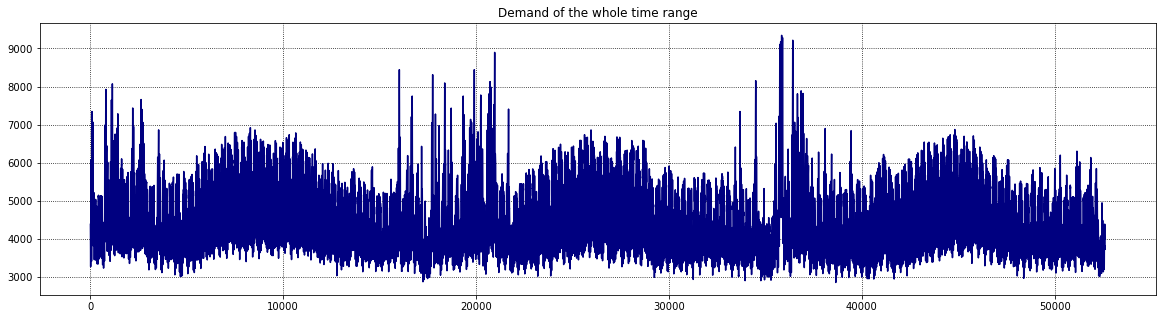

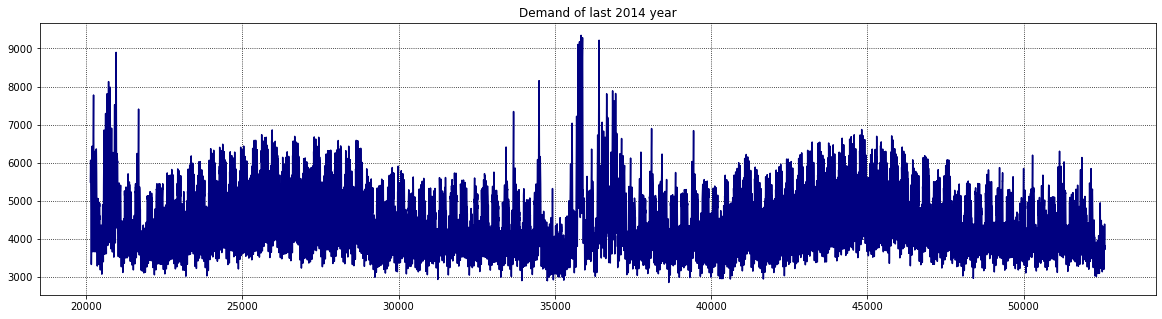

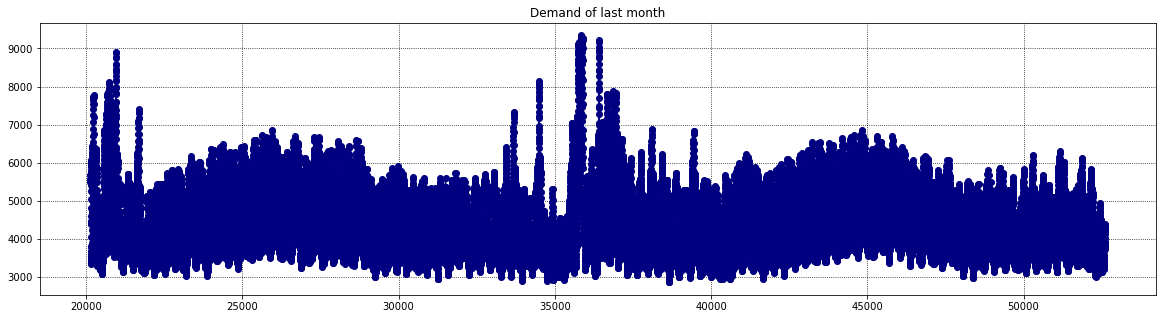

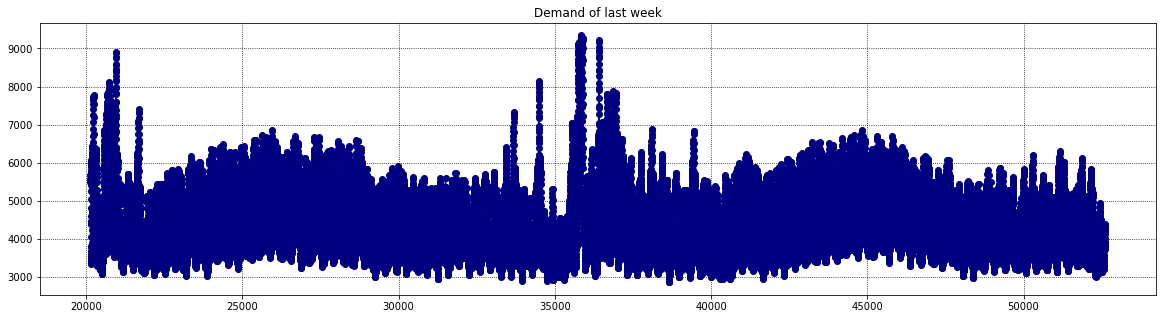

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(vic_elec['Demand'], color='navy')
plt.title('Demand of the whole time range')
plt.grid(linestyle=':', color='k')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(vic_elec.loc['2014-01-01':, 'Demand'], color='navy')
plt.title('Demand of last 2014 year')
plt.grid(linestyle=':', color='k')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(vic_elec.loc['2014-12-01':, 'Demand'], '-o', color='navy')
plt.title('Demand of last month')
plt.grid(linestyle=':', color='k')
plt.show()

plt.figure(figsize=(20, 5));
plt.plot(vic_elec.loc['2014-12-25':, 'Demand'], '-o', color='navy')
plt.title('Demand of last week')
plt.grid(linestyle=':', color='k')
plt.show()

<div style="background-color: rgb(255, 218, 233);">
<span style="color: rgb(206, 32, 41)">

**ERROR:** 

That is not neither "last month" nor "last week"

</span>
</div>

In [16]:
pelt.head()

Year     Hare     Lynx
0  1845  19580.0  30090.0
1  1846  19600.0  45150.0
2  1847  19610.0  49150.0
3  1848  11990.0  39520.0
4  1849  28040.0  21230.0

In [17]:
fig = px.line(pelt, x='Year', y=['Hare', 'Lynx'], title='Hare and Lynx changes', markers=True)
fig.show()

# year interval

# Task: 3 

Download the file tute1.csv from the book website, open it in Excel (or some other spreadsheet application), and review its contents. You should find four columns of information. Columns B through D each contain a quarterly series, labelled Sales, AdBudget and GDP. Sales contains the quarterly sales for a small company over the period 1981-2005. AdBudget is the advertising budget and GDP is the gross domestic product. All series have been adjusted for inflation.



In [22]:
tute = pd.read_csv('data/tute.csv')
tute.head()

Quarter   Sales  AdBudget    GDP
0  1981-03-01  1020.2     659.2  251.8
1  1981-06-01   889.2     589.0  290.9
2  1981-09-01   795.0     512.5  290.8
3  1981-12-01  1003.9     614.1  292.4
4  1982-03-01  1057.7     647.2  279.1

In [23]:
tute.isna().sum(axis=0)

Quarter     0
Sales       0
AdBudget    0
GDP         0
dtype: int64

<div style="background-color: rgb(144, 238, 144);">
<span style="color: rgb(0, 128, 0);">

**THUMP UP:** 

At least missig values have been checked :)
    
</span>
</div>

In [24]:
fig = px.line(tute, x="Quarter", y=['Sales','AdBudget', 'GDP'], title='Sales, AdBudget, GDP changes')
fig.show()

<div style="background-color: rgb(175, 219, 245);">
<span style="color:blue">

**NOTE:** 

What if you plot normalized/scaled values?

</span>
</div>

# Task: 5

Download tourism.xlsx from the book website and read it into R using readxl::read_excel().

1. Create a tsibble which is identical to the tourism tsibble from the tsibble package.
2. Find what combination of Region and Purpose had the maximum number of overnight trips on average.
3. Create a new tsibble which combines the Purposes and Regions, and just has total trips by State.

In [25]:
tourism = pd.read_csv('data/tourism.csv')

In [26]:
tourism

Quarter           Region            State   Purpose       Trips
0      1998-01-01         Adelaide  South Australia  Business  135.077690
1      1998-04-01         Adelaide  South Australia  Business  109.987316
2      1998-07-01         Adelaide  South Australia  Business  166.034687
3      1998-10-01         Adelaide  South Australia  Business  127.160464
4      1999-01-01         Adelaide  South Australia  Business  137.448533
...           ...              ...              ...       ...         ...
24315  2016-10-01  Yorke Peninsula  South Australia  Visiting   33.672151
24316  2017-01-01  Yorke Peninsula  South Australia  Visiting   46.223014
24317  2017-04-01  Yorke Peninsula  South Australia  Visiting   50.582837
24318  2017-07-01  Yorke Peninsula  South Australia  Visiting   27.766728
24319  2017-10-01  Yorke Peninsula  South Australia  Visiting   46.281578

[24320 rows x 5 columns]

In [27]:
tourism_grouped = tourism.groupby(['Region', 'Purpose']).sum('Trips').reset_index().sort_values('Trips',ascending=False)

In [28]:
tourism_grouped.head()
# Sydney; Visiting

Region   Purpose         Trips
271           Sydney  Visiting  59781.597453
199        Melbourne  Visiting  49511.803281
268           Sydney  Business  48163.510696
217  North Coast NSW   Holiday  47031.730539
269           Sydney   Holiday  44026.149221

In [29]:
tourism_grouped_by_state = tourism.groupby(['State']).sum('Trips').reset_index().sort_values('Trips',ascending=False)
tourism_grouped_by_state

State          Trips
1     New South Wales  557367.430368
6            Victoria  390462.911453
3          Queensland  386642.911752
7   Western Australia  147819.653238
4     South Australia  118151.348155
5            Tasmania   54137.094786
0                 ACT   41006.585207
2  Northern Territory   28613.683011

# Task 6

Create time plots of the following four time series: Bricks from aus_production, Lynx from pelt, Close from gafa_stock, Demand from vic_elec.

1. Use ? (or help()) to find out about the data in each series.
2. For the last plot, modify the axis labels and title.

In [30]:
aus_production = load_data('aus_production')

# for vic_elec, gafa_stock, pelt check TASK:1, 2

In [31]:
px.line(aus_production, x='Quarter', y='Bricks', title='Quarter bricks production', markers=True)

# Task: 7

The aus_arrivals data set comprises quarterly international arrivals to Australia from Japan, New Zealand, UK and the US.

1. Use autoplot(), gg_season() and gg_subseries() to compare the differences between the arrivals from these four countries.
2. Can you identify any unusual observations?

In [32]:
aus_arrivals = load_data('aus_arrivals')

In [33]:
aus_arrivals.head()

Quarter Origin  Arrivals
0  1981 Q1  Japan     14763
1  1981 Q2  Japan      9321
2  1981 Q3  Japan     10166
3  1981 Q4  Japan     19509
4  1982 Q1  Japan     17117

In [34]:
px.line(aus_arrivals, x='Quarter', y='Arrivals', color='Origin', markers=True, title='Number of arrivals to different countries')

# Can you identify any unusual observations?
# I dont see any real outliers in these plots (may be in Japan and NZ there are 2 points with peaks) 

# Taks: 8 

Monthly Australian retail data is provided in aus_retail. Select one of the time series as follows (but choose your own seed value

1. Can you spot any seasonality, cyclicity and trend? What do you learn about the series?



In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
aus_retail = load_data('aus_retail')

In [37]:
aus_retail

State                                  Industry  \
0      Australian Capital Territory  Cafes, restaurants and catering services   
1      Australian Capital Territory  Cafes, restaurants and catering services   
2      Australian Capital Territory  Cafes, restaurants and catering services   
3      Australian Capital Territory  Cafes, restaurants and catering services   
4      Australian Capital Territory  Cafes, restaurants and catering services   
...                             ...                                       ...   
64527             Western Australia                    Takeaway food services   
64528             Western Australia                    Takeaway food services   
64529             Western Australia                    Takeaway food services   
64530             Western Australia                    Takeaway food services   
64531             Western Australia                    Takeaway food services   

       Series ID     Month  Turnover  
0      A3349849A  1982 Apr       4.4  
1      A3349849A  1982 May       3.4  
2      A3349849A  1982 Jun       3.6  
3      A3349849A  1982 Jul       4.0  
4      A3349849A  1982 Aug       3.6  
...          ...       ...       ...  
64527  A3349435A  2018 Aug     178.5  
64528  A3349435A  2018 Sep     179.8  
64529  A3349435A  2018 Oct     183.2  
64530  A3349435A  2018 Nov     183.7  
64531  A3349435A  2018 Dec     195.1  

[64532 rows x 5 columns]

In [38]:
df = aus_retail[aus_retail['Series ID'] == 'A3349849A']
# select one series

In [39]:
px.line(df, x='Month', y='Turnover', markers=False, title='Turnover for A3349849A client')

In [40]:
df.set_index('Month', inplace=True)
df.index = pd.to_datetime(df.index, format='%Y %b')
df
# df = df['Turnover']

State  \
Month                                      
1982-04-01  Australian Capital Territory   
1982-05-01  Australian Capital Territory   
1982-06-01  Australian Capital Territory   
1982-07-01  Australian Capital Territory   
1982-08-01  Australian Capital Territory   
...                                  ...   
2018-08-01  Australian Capital Territory   
2018-09-01  Australian Capital Territory   
2018-10-01  Australian Capital Territory   
2018-11-01  Australian Capital Territory   
2018-12-01  Australian Capital Territory   

                                            Industry  Series ID  Turnover  
Month                                                                      
1982-04-01  Cafes, restaurants and catering services  A3349849A       4.4  
1982-05-01  Cafes, restaurants and catering services  A3349849A       3.4  
1982-06-01  Cafes, restaurants and catering services  A3349849A       3.6  
1982-07-01  Cafes, restaurants and catering services  A3349849A       4.0  
1982-08-01  Cafes, restaurants and catering services  A3349849A       3.6  
...                                              ...        ...       ...  
2018-08-01  Cafes, restaurants and catering services  A3349849A      41.7  
2018-09-01  Cafes, restaurants and catering services  A3349849A      41.4  
2018-10-01  Cafes, restaurants and catering services  A3349849A      41.7  
2018-11-01  Cafes, restaurants and catering services  A3349849A      44.0  
2018-12-01  Cafes, restaurants and catering services  A3349849A      40.9  

[441 rows x 4 columns]

In [41]:
decomposition = seasonal_decompose(df['Turnover'], model='additive', period=12)

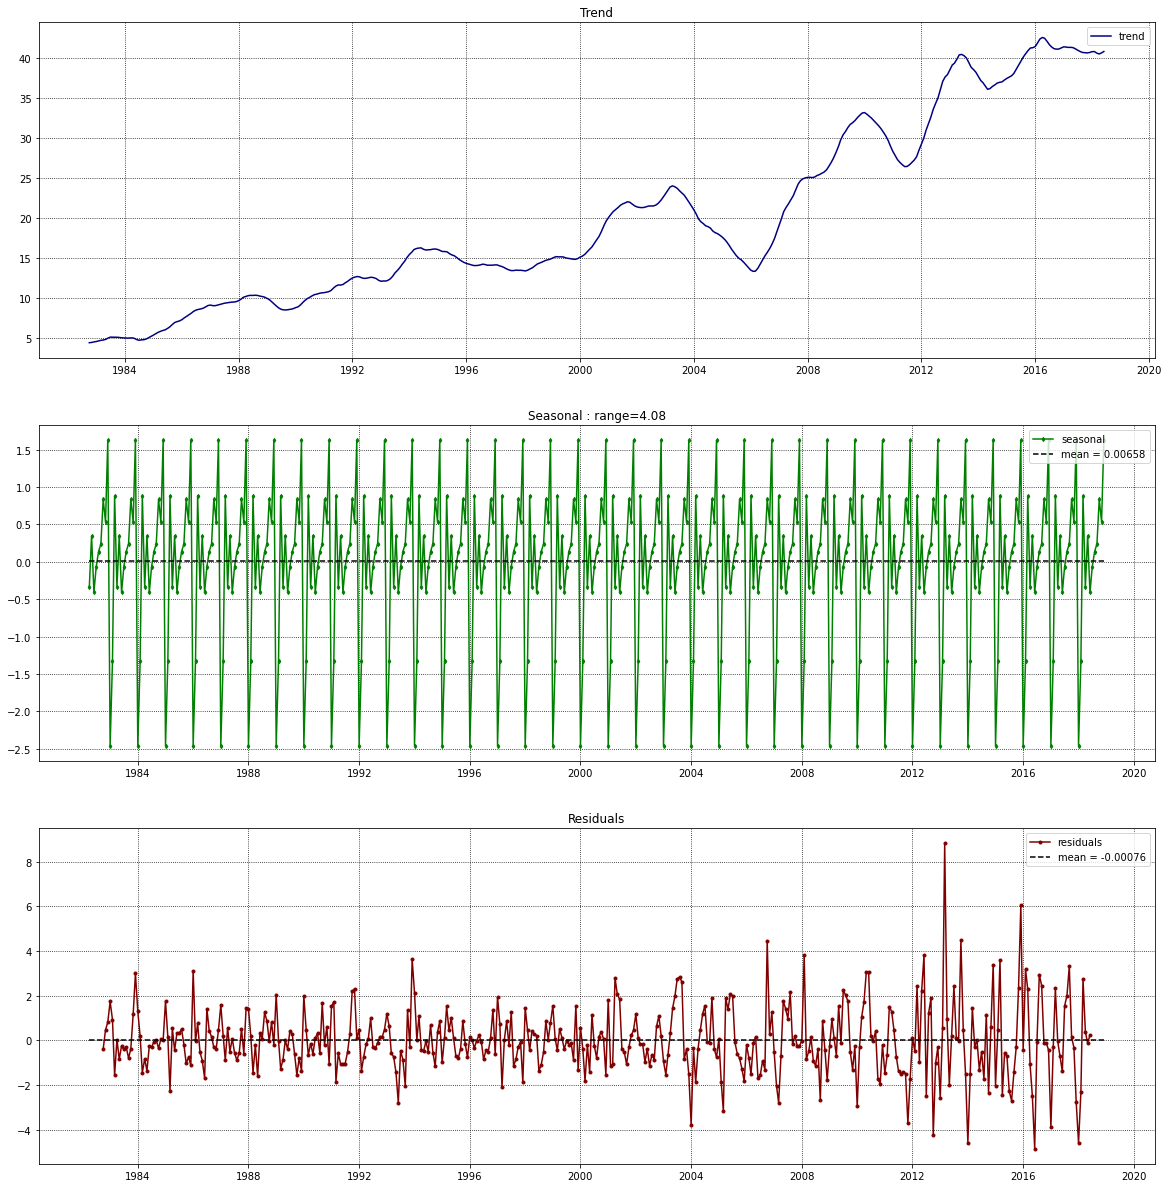

In [42]:
plot_decomposition(decomposition)

In [43]:
# Decomposition detect only trend and seasonal components, so if we have cyclicity component, 
# it will be seen in trend and residual plots

# Task 9

Use the following graphics functions: **autoplot(), gg_season(), gg_subseries(), gg_lag(), ACF()** and explore features from the following time series: 
1. “Total Private” Employed from us_employment,
2. Bricks from aus_production
3. Hare from pelt
4. “H02” Cost from PBS, and us_gasoline.

Questions are:
1. Can you spot any seasonality, cyclicity and trend?
2. What do you learn about the series?
3. What can you say about the seasonal patterns?
4. Can you identify any unusual years?

In [44]:
us_employment = load_data('us_employment')
aus_production = load_data('aus_production')
pelt = load_data('pelt')
PBS = load_data('PBS') 

## us_employment

In [45]:
us_employment_observed = us_employment[us_employment.Title == 'Total Private']
us_employment_observed.Month = pd.to_datetime(us_employment_observed.Month)
us_employment_observed.set_index('Month', inplace=True)
us_employment_observed = us_employment_observed.Employed

In [46]:
px.line(us_employment_observed)

In [47]:
decomposition = seasonal_decompose(us_employment_observed, period=12, model='additive')

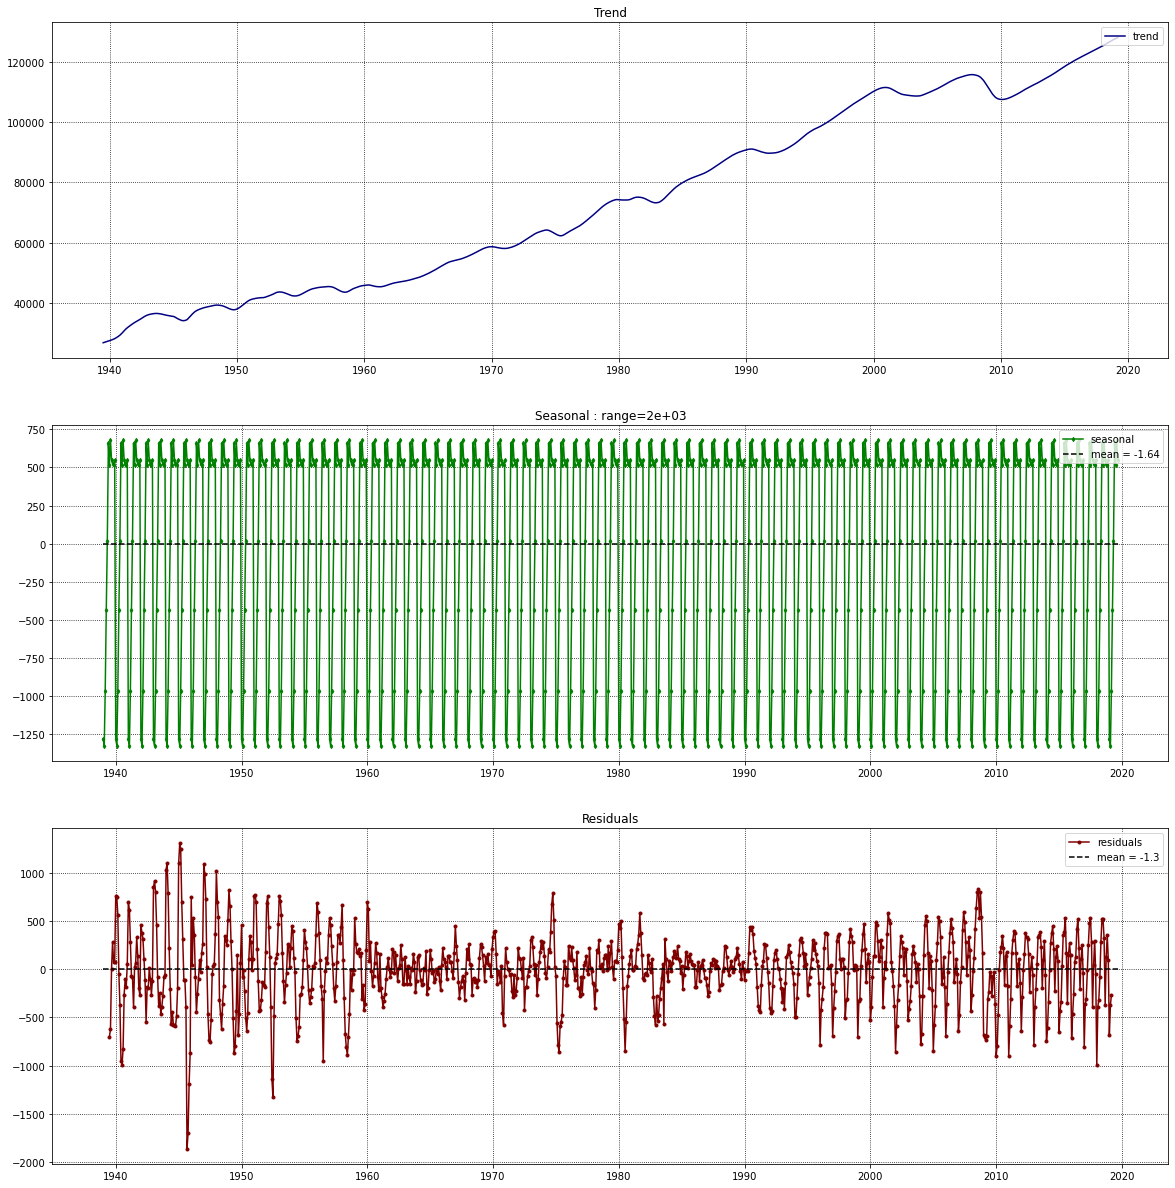

In [48]:
plot_decomposition(decomposition)

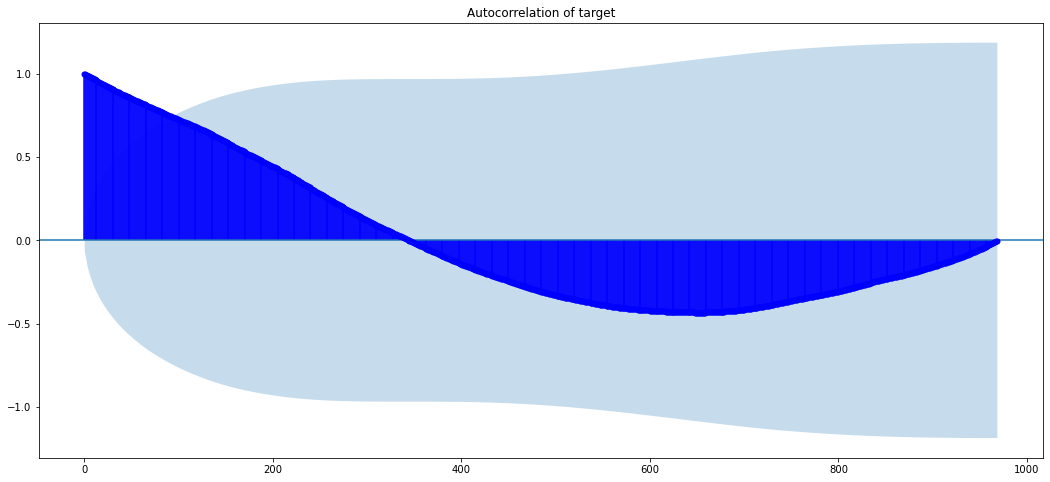

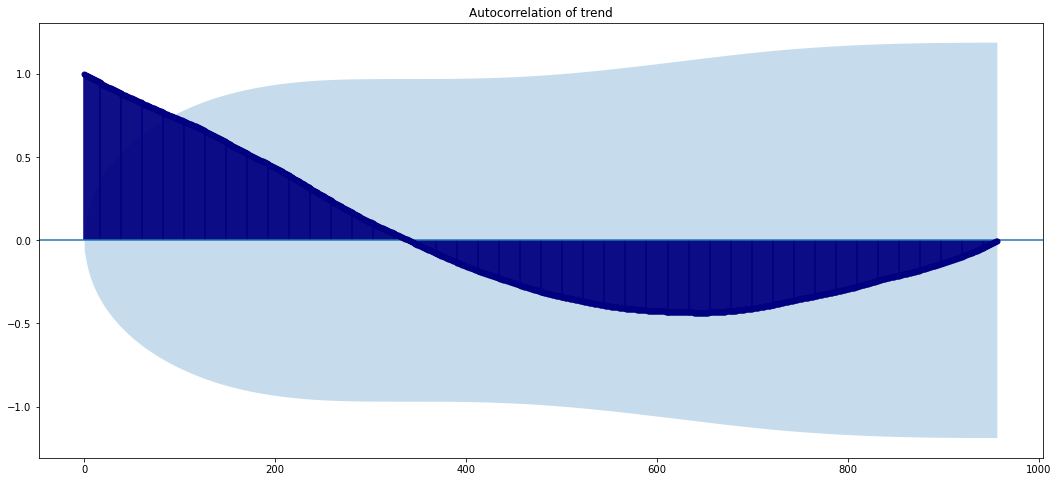

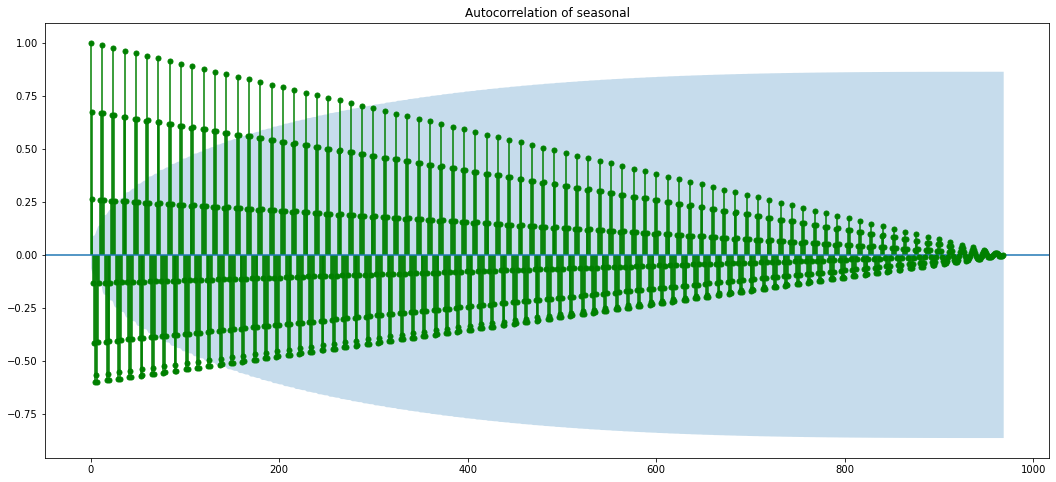

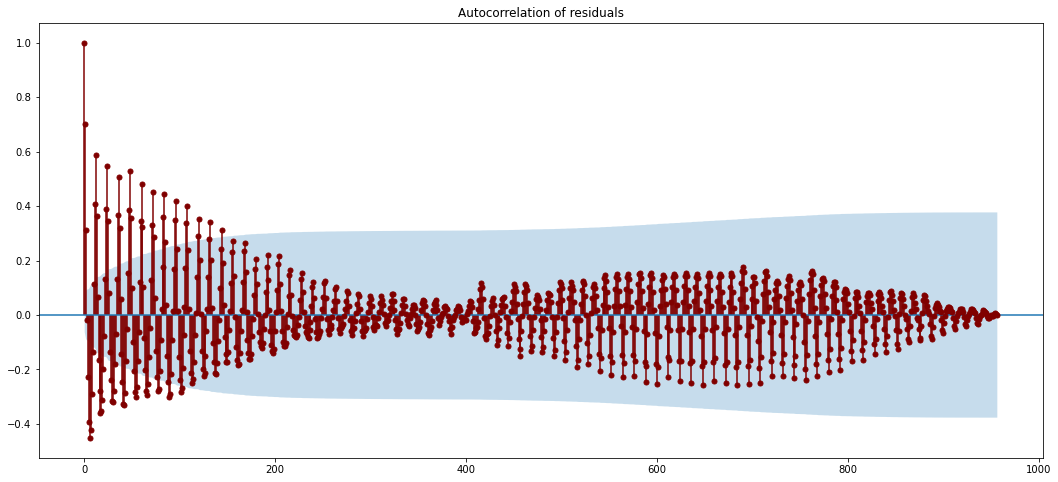

In [49]:
correlation_analysis(us_employment_observed, decomposition)

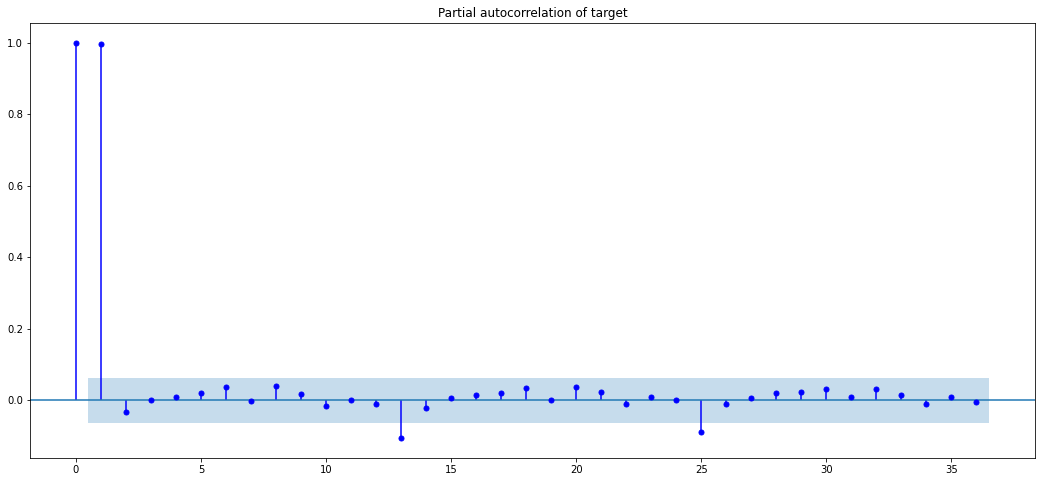

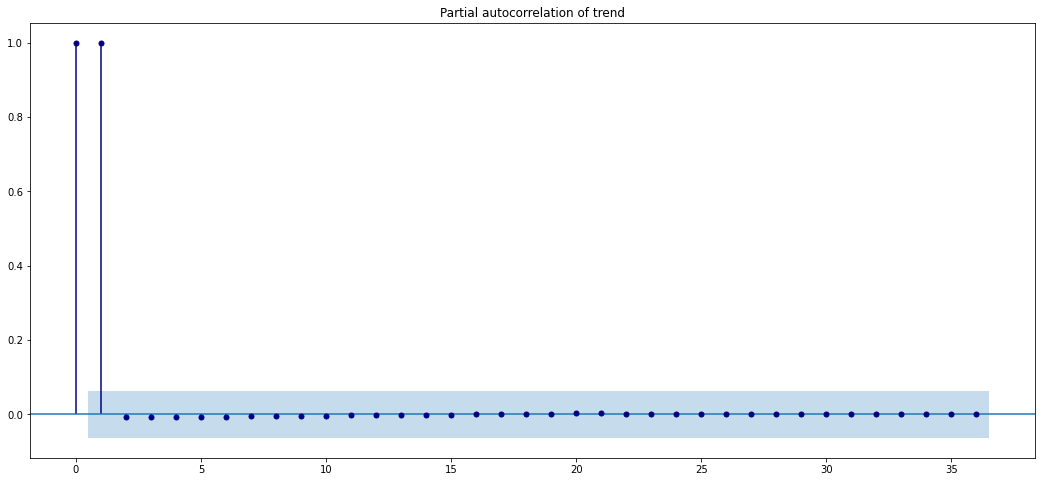

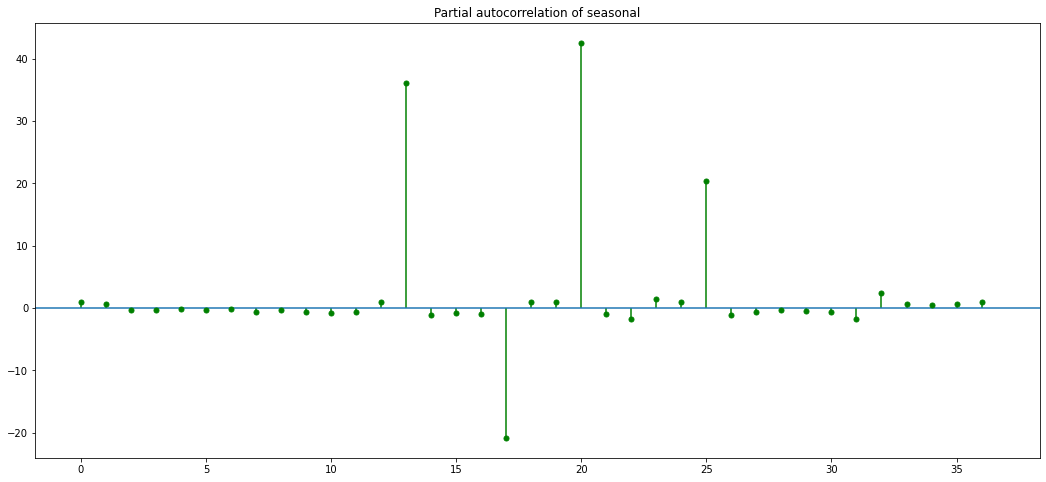

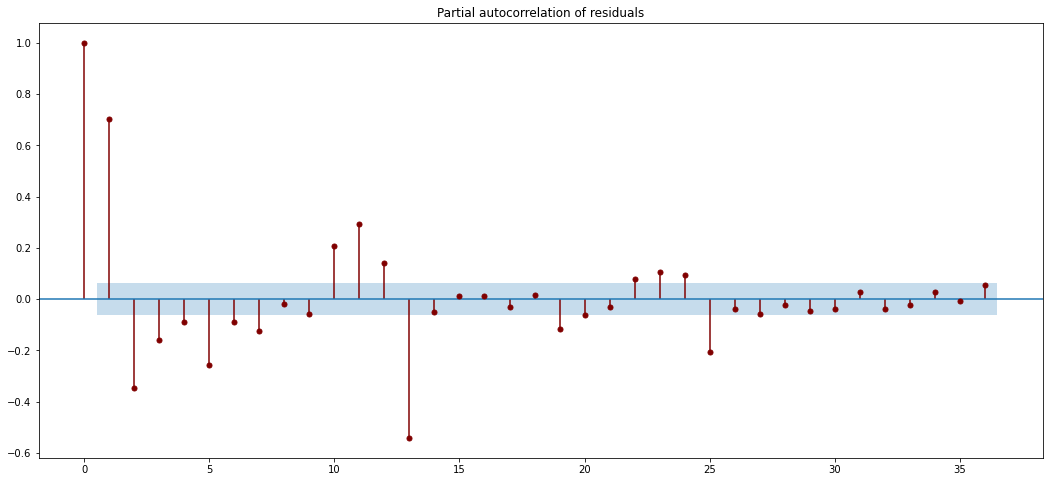

In [50]:
partial_autocorrelation(us_employment_observed, decomposition, 36)

1. we decompose series with trend, seasonal and residuals components. 
    * seasonal component looks strange, but i think it
    * residuals look very bad, not stationary series (without mean=0 and std=constant)
2. What do you learn about the series
    * many questions arrised while odserving this series. We should create better decomposition and detect cyclical component (for now i dont know how to do it :) )
3. What can you say about the seasonal patterns?
    * it is clear that from january to december we can catch uptrend but it feels down from december to january
4. Can you identify any unusual years?
    * I don't thing that there are any unysual years but there are cyclical component that we dont catch

<div style="background-color: rgb(250, 230, 250);">
<span style="color: rgb(204, 51, 204)">.

**DISCUSS:** 

</span>.
</div>

## aus_production

In [51]:
aus_production.head()
# Bricks from aus_production

Quarter  Beer  Tobacco  Bricks  Cement  Electricity  Gas
0  1956 Q1   284   5225.0   189.0     465         3923    5
1  1956 Q2   213   5178.0   204.0     532         4436    6
2  1956 Q3   227   5297.0   208.0     561         4806    7
3  1956 Q4   308   5681.0   197.0     570         4418    6
4  1957 Q1   262   5577.0   187.0     529         4339    5

In [52]:
qs = aus_production['Quarter'].str.replace(r'(\d+) (Q\d)', r'\1-\2')
qs

0      1956-Q1
1      1956-Q2
2      1956-Q3
3      1956-Q4
4      1957-Q1
        ...   
213    2009-Q2
214    2009-Q3
215    2009-Q4
216    2010-Q1
217    2010-Q2
Name: Quarter, Length: 218, dtype: object

In [53]:
index = pd.PeriodIndex(qs, freq='Q').to_timestamp()
index

DatetimeIndex(['1956-01-01', '1956-04-01', '1956-07-01', '1956-10-01',
               '1957-01-01', '1957-04-01', '1957-07-01', '1957-10-01',
               '1958-01-01', '1958-04-01',
               ...
               '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
               '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01'],
              dtype='datetime64[ns]', name='Quarter', length=218, freq='QS-OCT')

<div style="background-color: rgb(144, 238, 144);">
<span style="color: rgb(0, 128, 0);">

**THUMP UP:** 

Yahoo! At least here we see how to convert `str` type of timemarks in something more appropriate! :)
    
</span>
</div>

In [54]:
aus_production_observed = aus_production.copy()
aus_production_observed.set_index('Quarter', inplace=True)
aus_production_observed = aus_production_observed.Bricks
aus_production_observed.index = index

In [55]:
aus_production_observed

Quarter
1956-01-01    189.0
1956-04-01    204.0
1956-07-01    208.0
1956-10-01    197.0
1957-01-01    187.0
              ...  
2009-04-01      NaN
2009-07-01      NaN
2009-10-01      NaN
2010-01-01      NaN
2010-04-01      NaN
Freq: QS-OCT, Name: Bricks, Length: 218, dtype: float64

In [56]:
aus_production_observed.isna().sum() / aus_production_observed.count() * 100

10.1010101010101

In [57]:
aus_production_observed[aus_production_observed.isna() == True]

Quarter
2005-07-01   NaN
2005-10-01   NaN
2006-01-01   NaN
2006-04-01   NaN
2006-07-01   NaN
2006-10-01   NaN
2007-01-01   NaN
2007-04-01   NaN
2007-07-01   NaN
2007-10-01   NaN
2008-01-01   NaN
2008-04-01   NaN
2008-07-01   NaN
2008-10-01   NaN
2009-01-01   NaN
2009-04-01   NaN
2009-07-01   NaN
2009-10-01   NaN
2010-01-01   NaN
2010-04-01   NaN
Freq: QS-OCT, Name: Bricks, dtype: float64

In [58]:
aus_production_observed.dropna(inplace=True)

<div style="background-color: rgb(255, 218, 233);">
<span style="color: rgb(206, 32, 41)">

**ERROR:** 

Why?! Why do you drop these rows?

</span>
</div>

In [59]:
px.line(aus_production_observed)

In [60]:
decomposition = seasonal_decompose(aus_production_observed, period=4, model='additive')

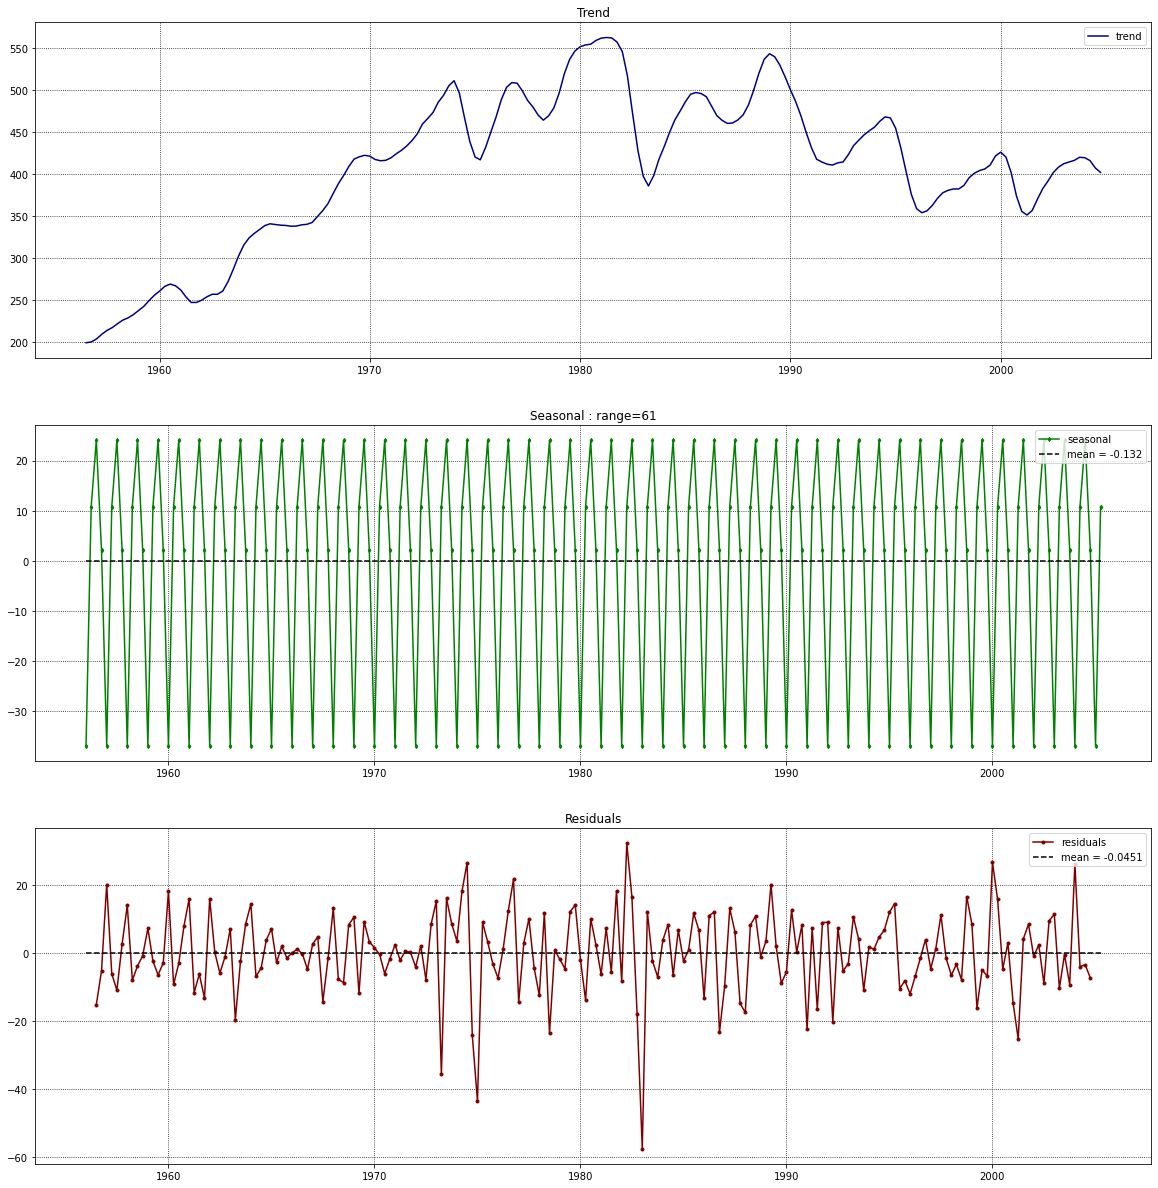

In [61]:
plot_decomposition(decomposition)

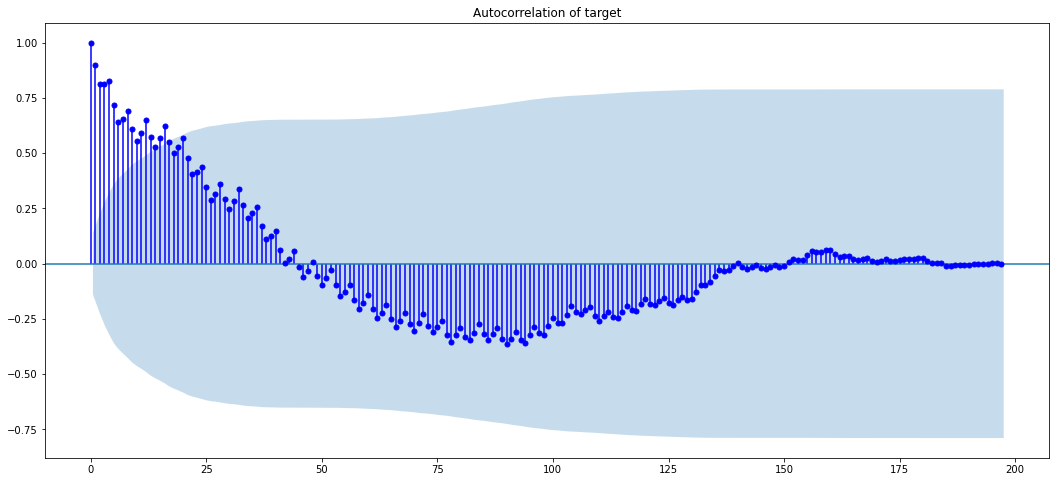

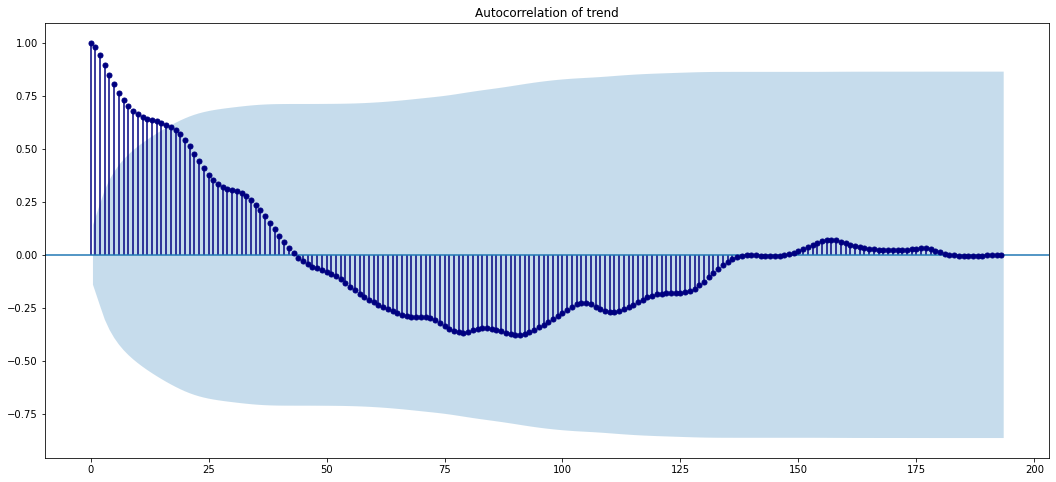

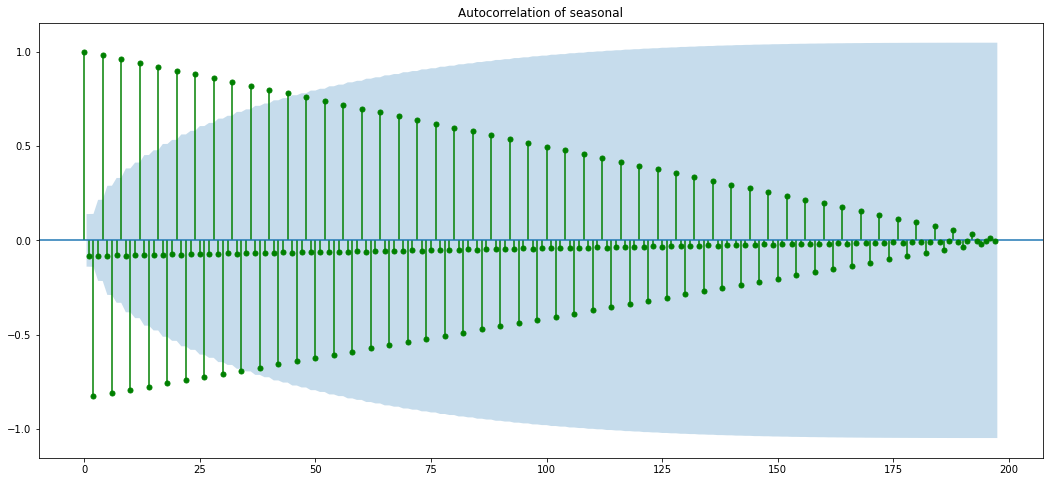

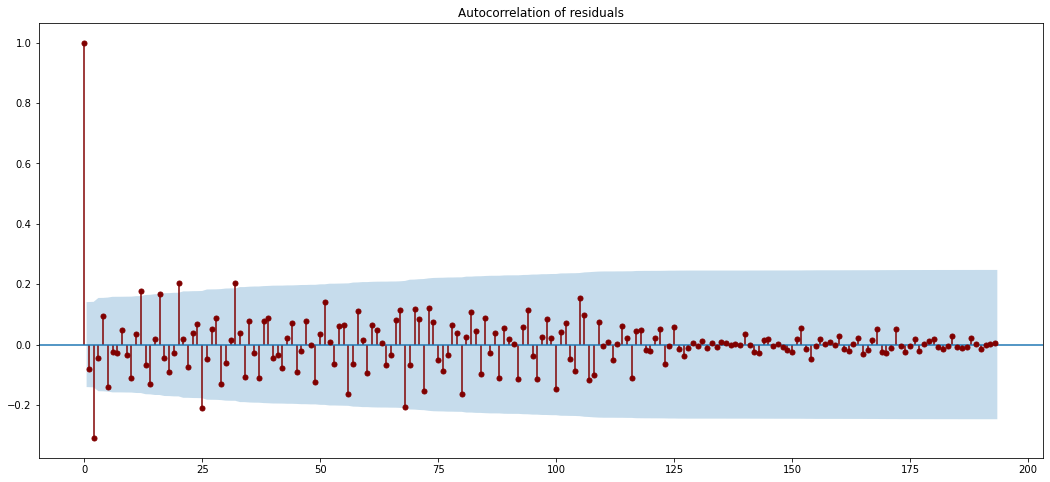

In [62]:
correlation_analysis(aus_production_observed, decomposition)

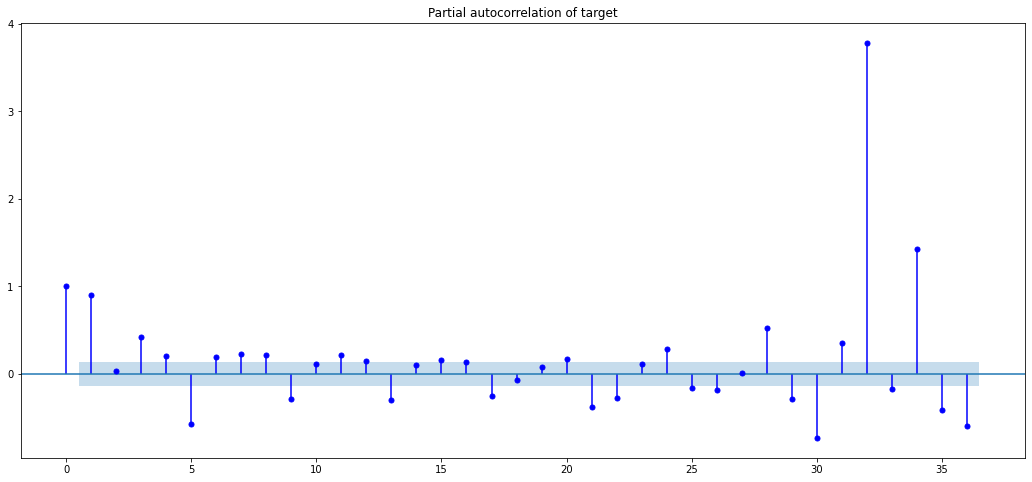

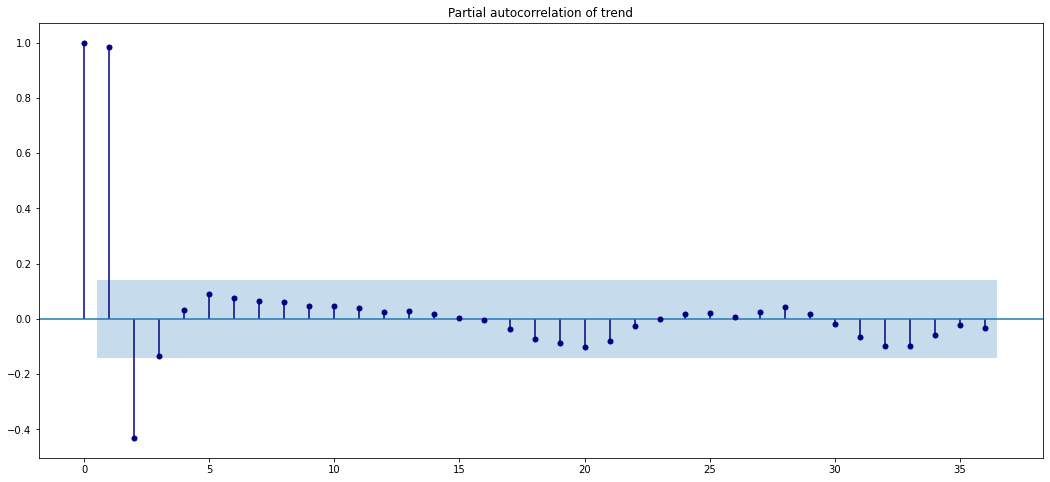

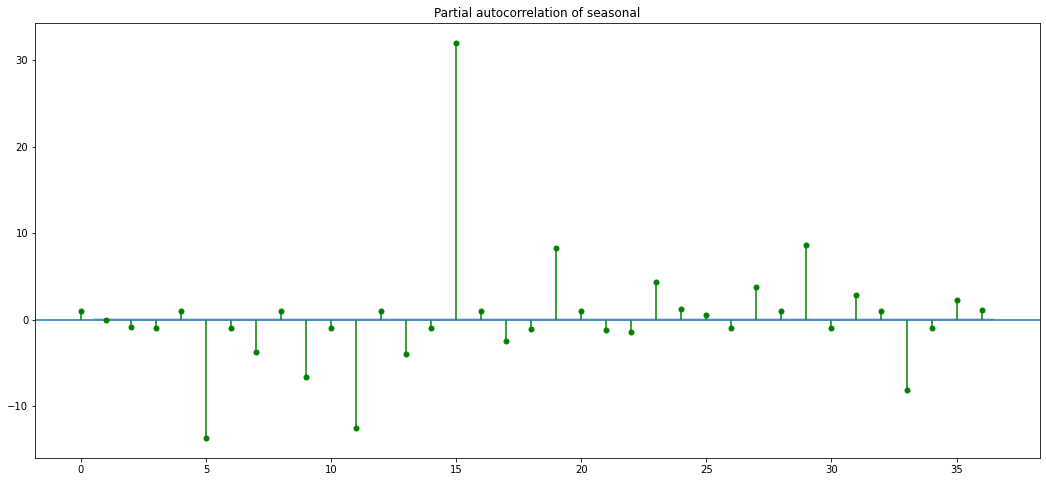

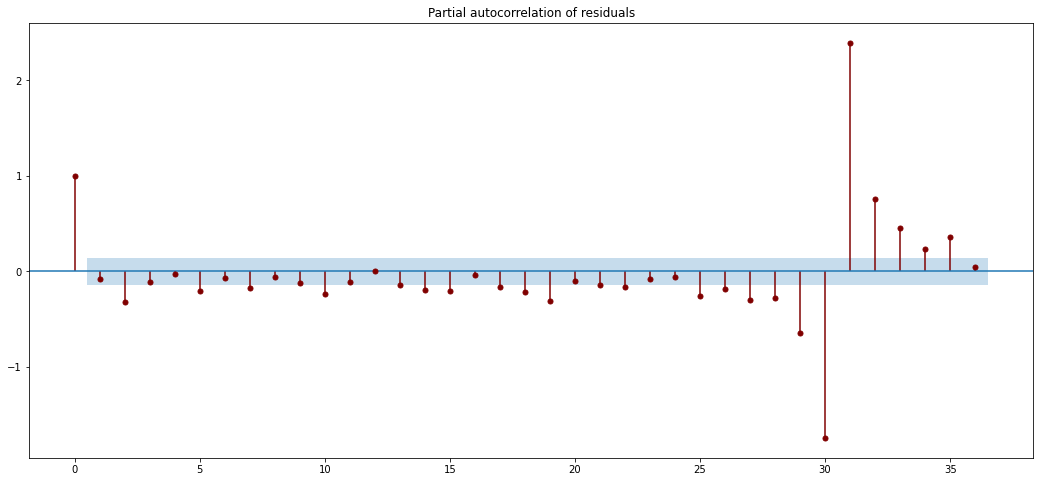

In [63]:
partial_autocorrelation(aus_production_observed, decomposition)

<div style="background-color: rgb(175, 219, 245);">
<span style="color:blue">

**NOTE:** 

To finalize the analysis of these data I recommend to analyze the distribution of residuals.`

</span>
</div>

<div style="background-color: rgb(250, 230, 250);">
<span style="color: rgb(204, 51, 204)">

**DISCUSS:** 
    
And to make it analysis not only "painting" I recommend you to train in the Art of Conclusions and Ideas.

</span>
</div>

# Task 10

The following time plots and ACF plots correspond to four different time series. Your task is to match each time plot in the first row with one of the ACF plots in the second row.

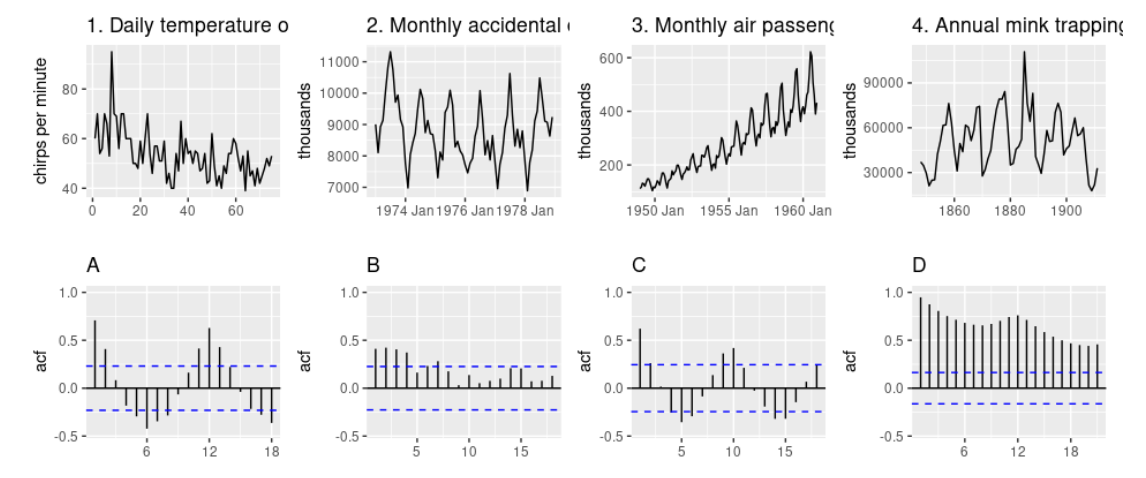

Answer: 
* 1 - b 
* 2 - a
* 3 - d
* 4 - c

# Task 11

The aus_livestock data contains the monthly total number of pigs slaughtered in Victoria, Australia, from Jul 1972 to Dec 2018. Use filter() to extract pig slaughters in Victoria between 1990 and 1995. Use autoplot() and ACF() for this data. How do they differ from white noise? If a longer period of data is used, what difference does it make to the ACF?



In [64]:
aus_livestock = load_data('aus_livestock')

In [65]:
aus_livestock.head()

Month                      Animal                         State   Count
0  1976 Jul  Bulls, bullocks and steers  Australian Capital Territory  2300.0
1  1976 Aug  Bulls, bullocks and steers  Australian Capital Territory  2100.0
2  1976 Sep  Bulls, bullocks and steers  Australian Capital Territory  2100.0
3  1976 Oct  Bulls, bullocks and steers  Australian Capital Territory  1900.0
4  1976 Nov  Bulls, bullocks and steers  Australian Capital Territory  2100.0

In [66]:
aus_livestock.Animal.unique()

array(['Bulls, bullocks and steers', 'Calves', 'Cattle (excl. calves)',
       'Cows and heifers', 'Lambs', 'Pigs', 'Sheep'], dtype=object)

In [67]:
aus_livestock.State.unique()

array(['Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia'], dtype=object)

In [68]:
aus_livestock[(aus_livestock['Animal'] == 'Pigs')]

Month Animal                         State    Count
20436  1972 Jul   Pigs  Australian Capital Territory   1700.0
20437  1972 Aug   Pigs  Australian Capital Territory   1500.0
20438  1972 Sep   Pigs  Australian Capital Territory   1700.0
20439  1972 Oct   Pigs  Australian Capital Territory   1500.0
20440  1972 Nov   Pigs  Australian Capital Territory   2000.0
...         ...    ...                           ...      ...
24895  2018 Aug   Pigs             Western Australia  66000.0
24896  2018 Sep   Pigs             Western Australia  74900.0
24897  2018 Oct   Pigs             Western Australia  62000.0
24898  2018 Nov   Pigs             Western Australia  61600.0
24899  2018 Dec   Pigs             Western Australia  74100.0

[4464 rows x 4 columns]

In [69]:
aus_livestock_observed = aus_livestock[(aus_livestock['Animal'] == 'Pigs') & (aus_livestock.State == 'Victoria')]
aus_livestock_observed.index = pd.to_datetime(aus_livestock_observed.Month, format='%Y %b')
aus_livestock_observed = aus_livestock_observed[(aus_livestock_observed.index < '1995-01-01') & (aus_livestock_observed.index >'1990-01-01')]
aus_livestock_observed = aus_livestock_observed.Count

In [70]:
aus_livestock_observed.head(3), aus_livestock_observed.tail(3)

(Month
 1990-02-01    78100.0
 1990-03-01    77600.0
 1990-04-01    84100.0
 Name: Count, dtype: float64,
 Month
 1994-10-01    116700.0
 1994-11-01    113900.0
 1994-12-01    125500.0
 Name: Count, dtype: float64)

<div style="background-color: rgb(144, 238, 144);">
<span style="color: rgb(0, 128, 0);">

**THUMP UP:** 

Transformation of date-time data is excellent!
    
</span>
</div>

<div style="background-color: rgb(255, 255, 224);">
<span style="color: rgb(186, 22, 12)">

**ALERT:** 

But once again - are you sure that they are monotonic and equidistant?

</span>
</div>

In [71]:
px.line(aus_livestock_observed)

In [72]:
decomposition = seasonal_decompose(aus_livestock_observed, period=12)

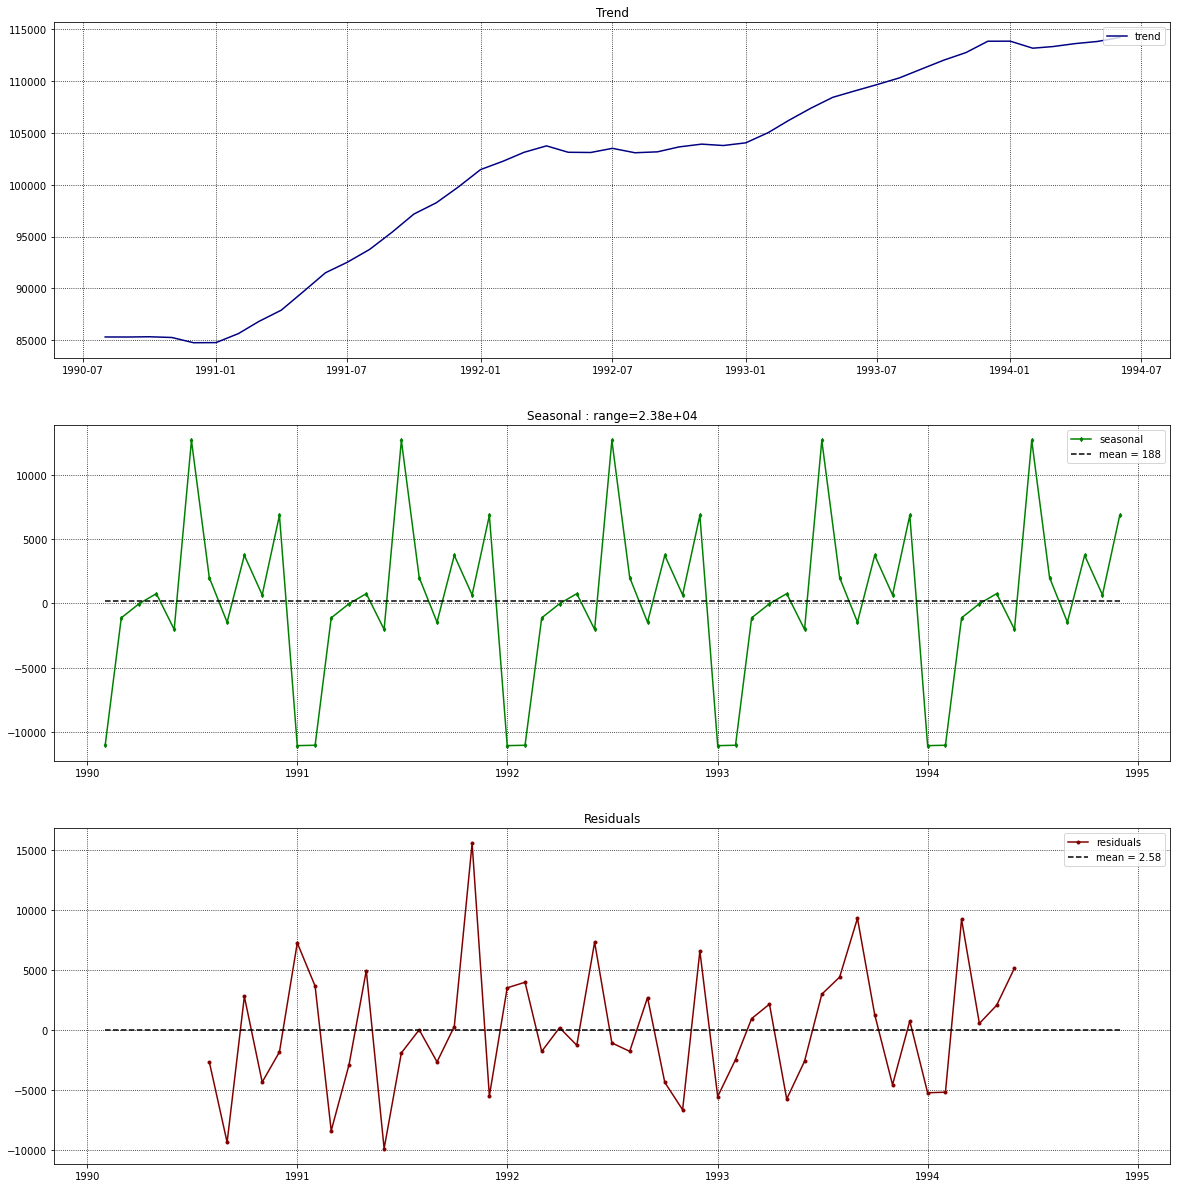

In [73]:
plot_decomposition(decomposition)

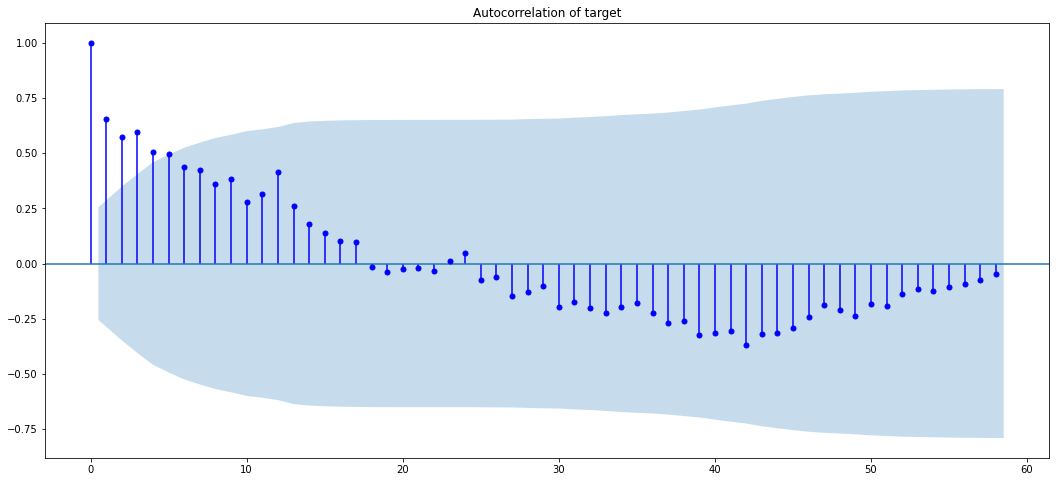

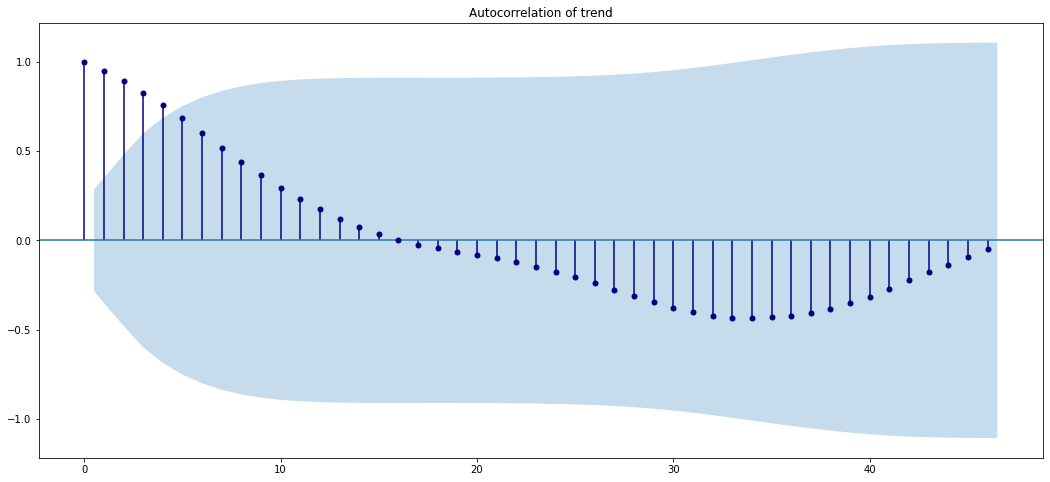

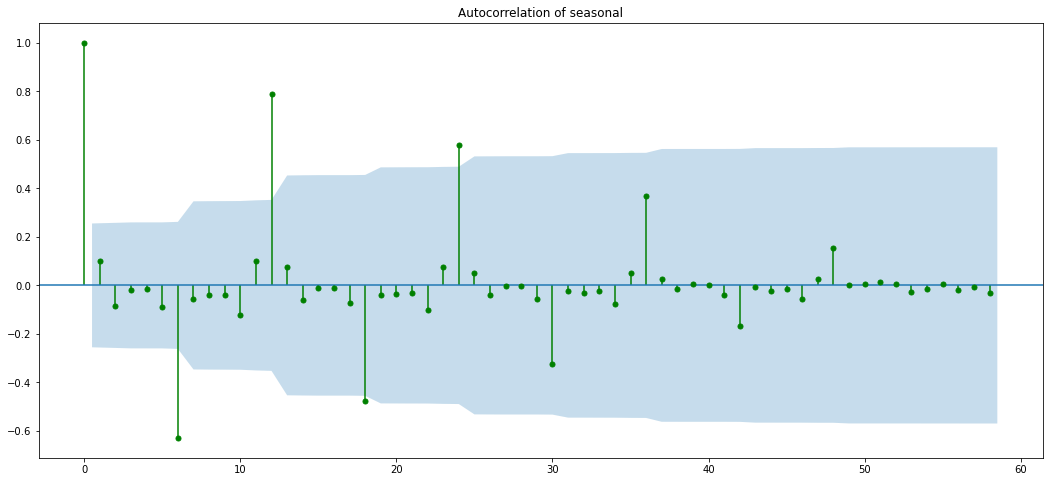

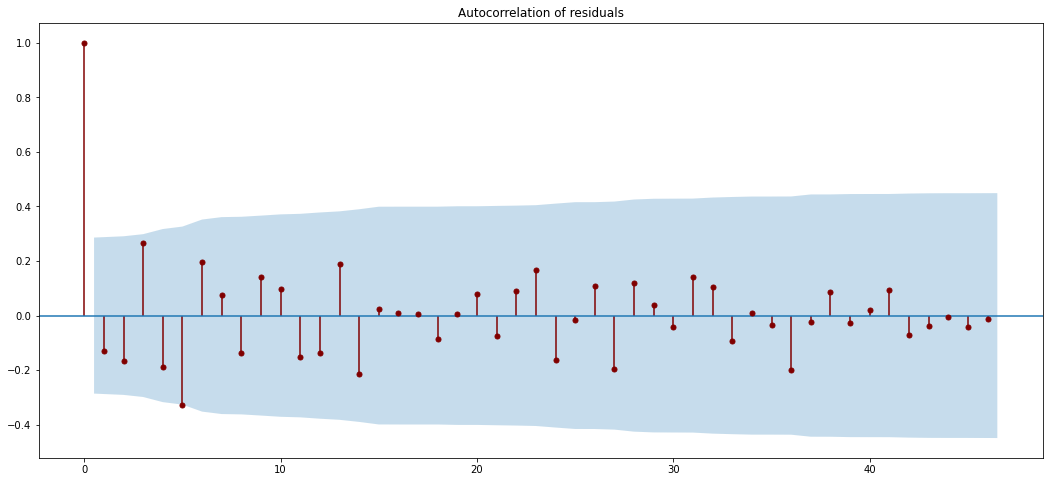

In [74]:
correlation_analysis(aus_livestock_observed, decomposition)

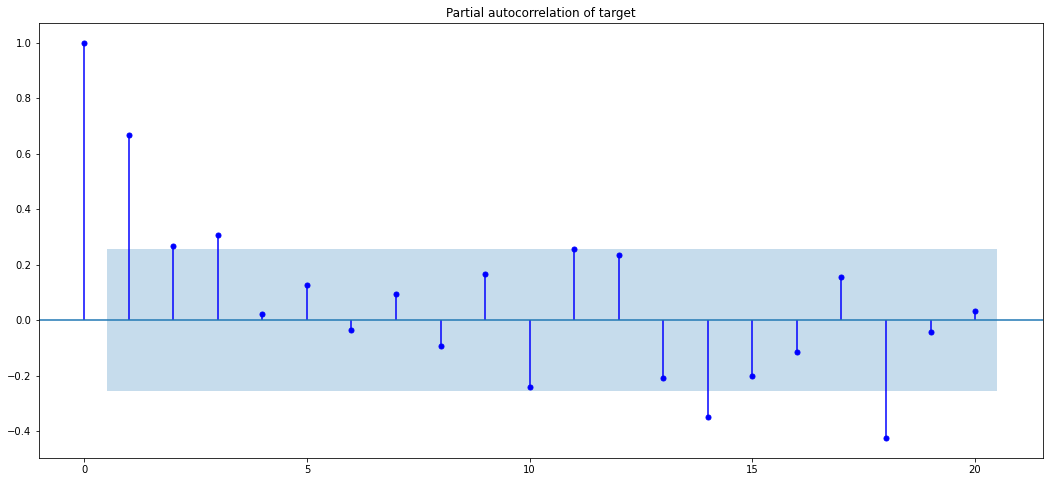

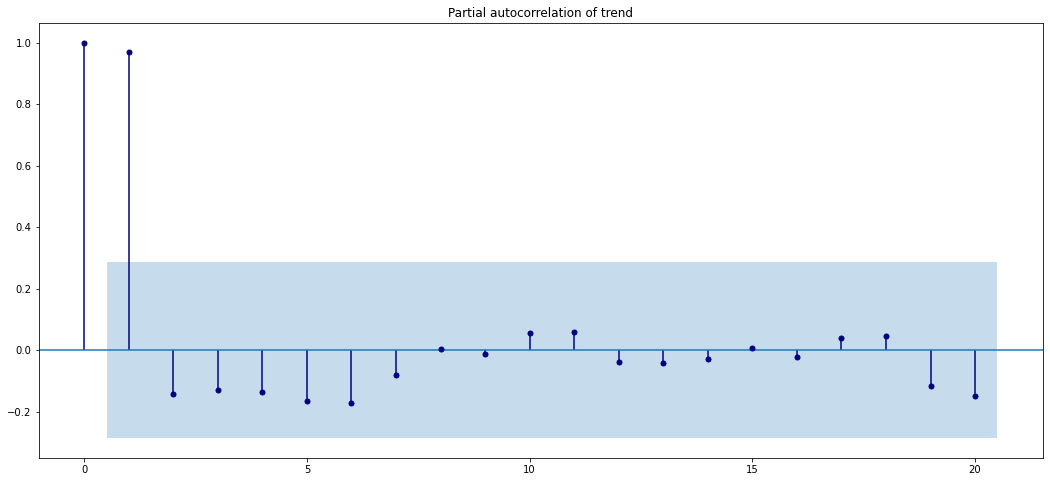

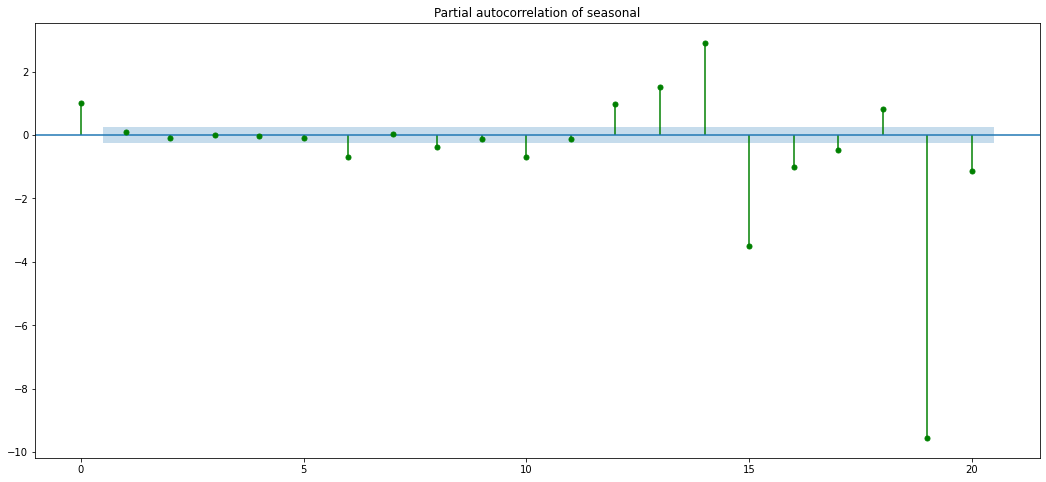

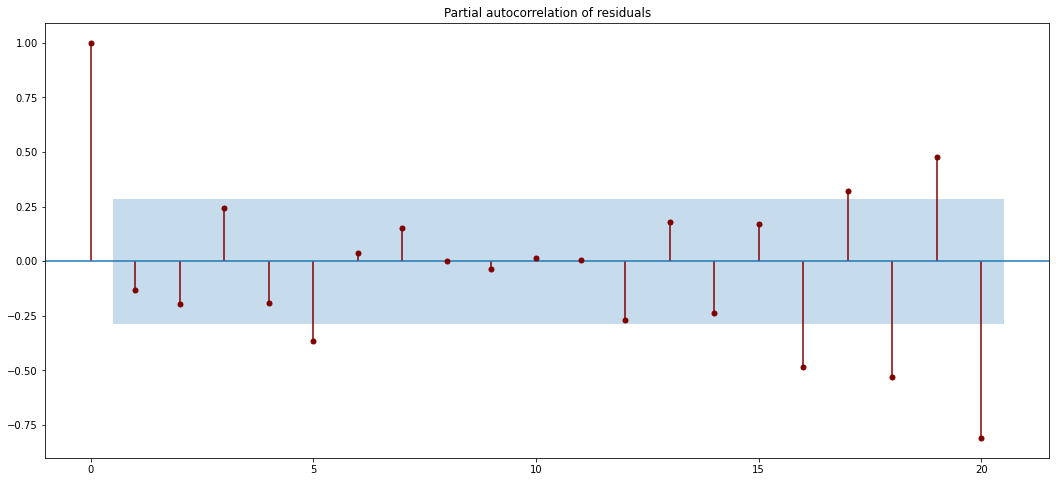

In [75]:
partial_autocorrelation(aus_livestock_observed, decomposition, lags=20)

All residuals lay under the confidence interval, it is good, but lest observe more detailed this part 

<div style="background-color: rgb(255, 255, 224);">
<span style="color: rgb(186, 22, 12)">

**ALERT:** 

The QUESTION: How should we study correlation characteristic of non-stationary processes?

</span>
</div>

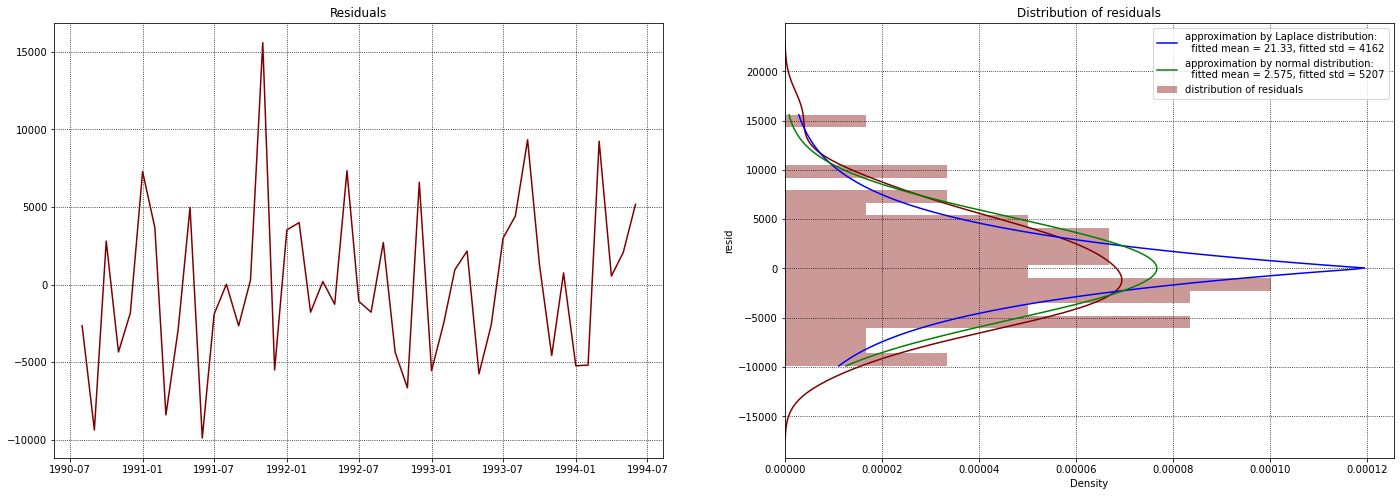

In [76]:
resid = decomposition.resid
color = 'maroon'

plt.subplots(1, 2, figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(resid, '-', color=color)
plt.grid(linestyle=':', color='k')
plt.title("Residuals")



x_fit = np.linspace(resid.min(), resid.max(), 201)
loc_laplace, scale_laplace = st.laplace.fit(resid.dropna())
loc_norm, scale_norm = st.norm.fit(resid.dropna())
# print(f"Fitting of residuals by Laplace distribution: fitted mean = {loc:.3f}, fitted std = {scale:.3f}")
y_fit_laplace = st.laplace.pdf(x_fit, loc_laplace, scale_laplace)
y_fit_norm = st.norm.pdf(x_fit, loc_norm, scale_norm)

plt.subplot(1, 2, 2)
sns.distplot(resid, color=color, bins=20, vertical=True, label="distribution of residuals")
plt.plot(y_fit_laplace, x_fit, '-b', 
         label=f"approximation by Laplace distribution:\n  fitted mean = {loc_laplace:.4g}, fitted std = {scale_laplace:.4g}")
plt.plot(y_fit_norm, x_fit, '-g', 
         label=f"approximation by normal distribution:\n  fitted mean = {loc_norm:.4g}, fitted std = {scale_norm:.4g}")
plt.legend()
# plt.ylim(resid-0.02*y_range, y_max+0.02*y_range)
plt.title("Distribution of residuals")
plt.grid(linestyle=':', color='k')

plt.show()

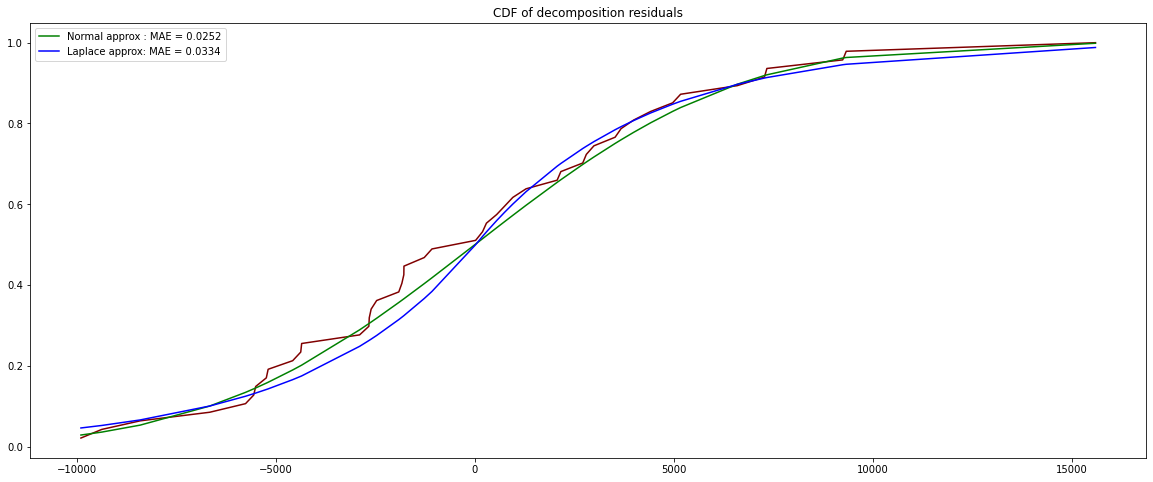

0.7545507162464334


In [77]:
ecdf_resid_instance = ECDF(resid.dropna())
resid_arr = resid.dropna().sort_values().values
ecdf_resid = ecdf_resid_instance(resid_arr)


cdf_norm = st.norm.cdf(resid_arr, loc=loc_norm, scale=scale_norm)
cdf_laplace = st.laplace.cdf(resid_arr, loc=loc_laplace, scale=scale_laplace)


mae_norm = mean_absolute_error(ecdf_resid, cdf_norm)
mae_laplace = mean_absolute_error(ecdf_resid, cdf_laplace)


plt.subplots(1, 1, figsize=(20, 8))
plt.plot(resid_arr, ecdf_resid, '-', color='maroon')
plt.plot(resid_arr, cdf_norm, '-g', 
         label=f"Normal approx : MAE = {mae_norm:.3g}")
plt.plot(resid_arr, cdf_laplace, '-b', 
         label=f"Laplace approx: MAE = {mae_laplace:.3g}")
plt.legend()
plt.title("CDF of decomposition residuals")
plt.show()

print(mae_norm/mae_laplace)

<div style="background-color: rgb(144, 238, 144);">
<span style="color: rgb(0, 128, 0);">

**THUMP UP:** 

Thanks for analysis of residuals!
    
</span>
</div>

<div style="background-color: rgb(175, 219, 245);">
<span style="color:blue">

**NOTE:** 

Conclusions are expected...

</span>
</div>

<div style="background-color: rgb(250, 230, 250);">
<span style="color: rgb(204, 51, 204)">.

**DISCUSS:** All below...

</span>.
</div>

<AxesSubplot:xlabel='resid', ylabel='Density'>

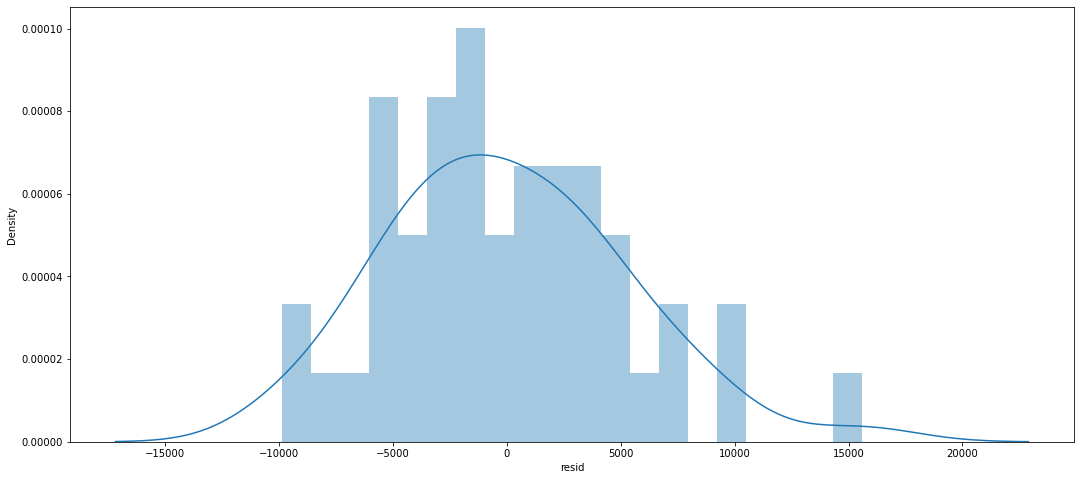

In [78]:
sns.distplot(resid, bins=20)

In [ ]:
sns.distplot(resid, bins=200)

So, i think residuals looks like a normal dist, but we should mention that there is a really big std